In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange
import load2disp
import disp2load
import utils
import time
import json

from obspy.core.utcdatetime import UTCDateTime

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.io.img_tiles import Stamen, OSM, GoogleTiles
# import contextily as ctx 

# 1D example

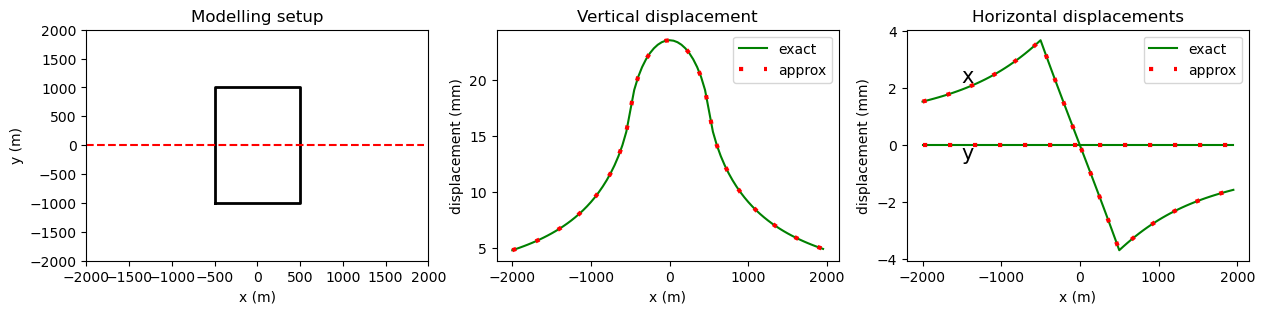

In [2]:
#providing boundaries and ticks for the general domain
xs = np.arange(-2000, 2000, 50)
y = 0
z = 0
Us = np.zeros((len(xs), 3))

#defining the region where pressure is applied
r = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.]])
p = 9.82*10**5
E = 0.6e11
v = 0.25

######### now finally computing the displacement and putting it in Us 
for i, x in enumerate(xs):
    xyz = [x, y, z]
    U = load2disp.load2disp( xyz, r, p, E, v)
    Us[ i, :] = U.reshape(3)
           
r_plot = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.], [-500., -1000.]])


fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].plot(r_plot[:,0],r_plot[:,1], color='black',linewidth=2)
ax[0].plot(xs,np.zeros_like(xs),color='red', linestyle='--')    
ax[0].set_title('Modelling setup')
ax[0].set_ylabel('y (m)')
ax[0].set_xlabel('x (m)')
ax[0].set_xlim(-2000,2000)
ax[0].set_ylim(-2000,2000)
ax[1].plot(xs,Us[:,2]*1000, color='green',label='exact')
ax[1].plot(xs,Us[:,2]*1000, color='red', linestyle=(0, (1,5)),linewidth=3, label='approx')
ax[1].set_ylabel('displacement (mm)')
ax[1].set_xlabel('x (m)')
ax[1].set_title('Vertical displacement')
ax[2].plot(xs,Us[:,0]*1000 ,label='exact', color='green')
ax[2].plot(xs,Us[:,1]*1000 ,color='green')

ax[2].plot(xs,Us[:,0]*1000, color='red',label='approx',linestyle=(0, (1,5)),linewidth=3)
ax[2].text(-1500,2.2,'x', fontsize=15)
ax[2].text(-1500,-0.5,'y', fontsize=15)
ax[2].plot(xs,Us[:,1]*1000, color='red', linestyle=(0, (1,5)),linewidth=3)

ax[2].set_xlabel('x (m)')
ax[2].set_title('Horizontal displacements')
ax[2].set_ylabel('displacement (mm)')

ax[1].legend()
ax[2].legend()
plt.savefig('profile1.pdf',bbox_inches='tight',dpi=300)

### 1D version with multiple sources

Text(0, 0.5, 'displacement (mm)')

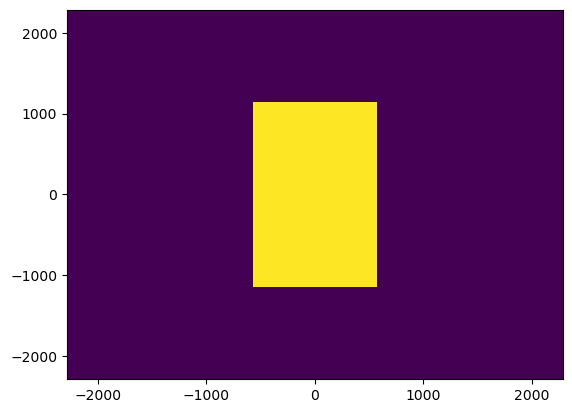

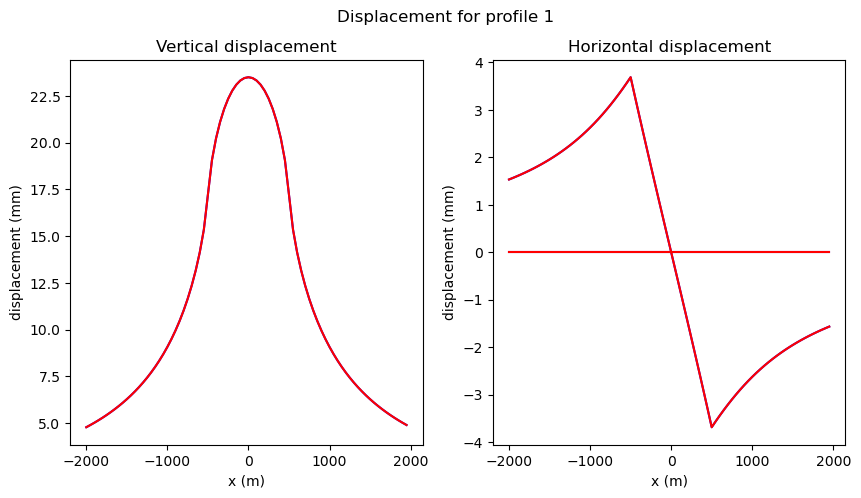

In [3]:
#providing boundaries and ticks for the general domain
xs = np.arange(-2000, 2000, 50)
y = 0
z = 0
Us = np.zeros((len(xs), 3))

#defining the region where pressure is applied
r = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.]])
p = 9.82*10**5
E = 0.6e11
v = 0.25


###### pour pouvoir faire la version avec plusieurs sources au lieu d'une seule source
ps = np.zeros((8,8))
ps[2:-2,3:-3] =  9.82*10**5
rs = utils.create_source_mesh(-2000,2000,-2000,2000,ps)

plt.figure()
plt.pcolormesh(np.linspace(-2000,2000,8),np.linspace(-2000,2000,8),ps)


######### now finally computing the displacement and putting it in Us 
for i, x in enumerate(xs):
    xyz = [x, y, z]
    U = load2disp.load2disp( xyz, r, p, E, v)
    Us[ i, :] = U.reshape(3)
           


fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Displacement for profile 1')
ax[0].plot(xs,Us[:,2]*1000,color='blue', label='1 source')
ax[0].set_ylabel('displacement (mm)')
ax[0].set_xlabel('x (m)')
ax[0].set_title('Vertical displacement')
ax[1].plot(xs,Us[:,0]*1000,color='blue',label='1 source') 
ax[1].plot(xs,Us[:,1]*1000, color='blue')
ax[1].set_xlabel('x (m)')
ax[1].set_title('Horizontal displacement')
ax[1].set_ylabel('displacement (mm)')


#### computing with multiple sources 
Us = np.zeros((len(xs), 3))

for vy_idx in range(len(ps[:,0])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vx_idx in range(len(ps[0,:])): 
        p = ps[vy_idx,vx_idx]
        r = rs[vy_idx,vx_idx]
        for i, x in enumerate(xs):
            xyz = [x, y, z]
            U = load2disp.load2disp( xyz, r, p, E, v)
            Us[ i, :] += U.reshape(3)

ax[0].plot(xs,Us[:,2]*1000, color='red',label='multiple sources')
ax[0].set_ylabel('displacement (mm)')
ax[0].set_xlabel('x (m)')
ax[0].set_title('Vertical displacement')
ax[1].plot(xs,Us[:,0]*1000,color='red', label='multiple sources')
ax[1].plot(xs,Us[:,1]*1000, color='red')
ax[1].set_xlabel('x (m)')
ax[1].set_title('Horizontal displacement')
ax[1].set_ylabel('displacement (mm)')


<Figure size 640x480 with 0 Axes>

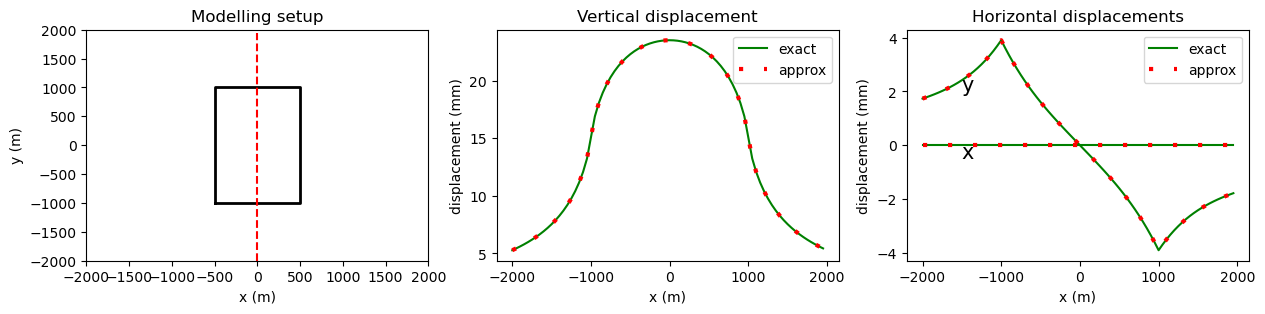

In [4]:
#providing boundaries and ticks for the general domain
x = 0
ys = np.arange(-2000, 2000, 50)
z = 0
Us = np.zeros((len(xs), 3))

#defining the region where pressure is applied
r = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.]])
p = 9.82*10**5
E = 0.6e11
v = 0.25

######### now finally computing the displacement and putting it in Us 
for i, y in enumerate(ys):
    xyz = [x, y, z]
    U = load2disp.load2disp( xyz, r, p, E, v)
    Us[i,:] = U.reshape(3)

r_plot = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.],[-500., -1000.]])
    
plt.figure()
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].plot(r_plot[:,0],r_plot[:,1], color='black',linewidth=2)
ax[0].plot(np.zeros_like(ys),ys,color='red', linestyle='--')    
ax[0].set_title('Modelling setup')
ax[0].set_ylabel('y (m)')
ax[0].set_xlabel('x (m)')
ax[0].set_xlim(-2000,2000)
ax[0].set_ylim(-2000,2000)
ax[1].plot(xs,Us[:,2]*1000, color='green',label='exact')
ax[1].plot(xs,Us[:,2]*1000, color='red', linestyle=(0, (1,5)),linewidth=3, label='approx')
ax[1].set_ylabel('displacement (mm)')
ax[1].set_xlabel('x (m)')
ax[1].set_title('Vertical displacement')
ax[2].plot(xs,Us[:,0]*1000 ,label='exact', color='green')
ax[2].plot(xs,Us[:,1]*1000 ,color='green')

ax[2].plot(xs,Us[:,0]*1000, color='red',label='approx',linestyle=(0, (1,5)),linewidth=3)
ax[2].text(-1500,2,'y', fontsize=15)
ax[2].text(-1500,-0.5,'x', fontsize=15)
ax[2].plot(xs,Us[:,1]*1000, color='red', linestyle=(0, (1,5)),linewidth=3)

ax[2].set_xlabel('x (m)')
ax[2].set_title('Horizontal displacements')
ax[2].set_ylabel('displacement (mm)')

ax[1].legend()
ax[2].legend()
plt.savefig('profile2.pdf',bbox_inches='tight',dpi=300)

# 2D example

3.2241268157958984


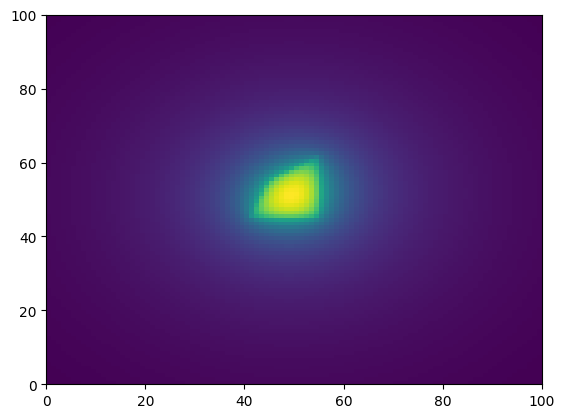

In [17]:
#providing boundaries and ticks for the general domain
xs = np.linspace(-5000, 5000, 100)
ys = np.linspace(-5000, 5000, 100)
z = 0
Us = np.zeros((len(ys), len(xs), 3))

#defining the region where pressure is applied
r = np.array([[-900., -500.], [500., -500.], [500., 1200.], [-500., 500.]])
p = 10.0
E = 1.0
v = 0.3


tim = time.time()

######### now finally computing the displacement and putting it in Us 
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        xyz = [x, y, z]
        U = futures.pop(0).result()
        Us[j, i, :] += U.reshape(3) 


plt.figure()
plt.pcolormesh(Us[:,:,2])

print(time.time()-tim) #

# 2D avec multiple sources

C'est bon ça fonctionne; maintenant il faudait faire des fonctions et tout pour pouvoir créér le maillage automatiqueement et alors associer 

In [4]:
#providing boundaries and ticks for the general domain
xs = np.linspace(-5000, 5000, 100)
ys = np.linspace(-5000, 5000, 100)
z = 0
Us = np.zeros((len(ys), len(xs), 3)) #créé la map des déplacement initialisée à 0 

#defining the region where pressure is applied
rs = np.array([[[-900., -500.], [500., -500.], [500., 1200.], [-500., 500.]],
               [[-2000., -0.], [0., -0.], [0., 2000.], [-2000., 2000.]]])

#met 2 sources et on associe à chacun ses valeurs de E, v et p 
ps = [10.0, 10.0]
Es = [1.0, 1.2]
vs = [0.3,0.25]

tim = time.time()

for v_idx in range(len(Es)): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 

    E = Es[v_idx]
    p = ps[v_idx]
    v = vs[v_idx]
    r = rs[v_idx]
    #computing the combinations of coordinate points where the displacement will have to be evaluated
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            xyz = [x, y, z]
            U = futures.pop(0).result()
            Us[j, i, :] += U.reshape(3) 

print(time.time()-tim) #

6.708471059799194


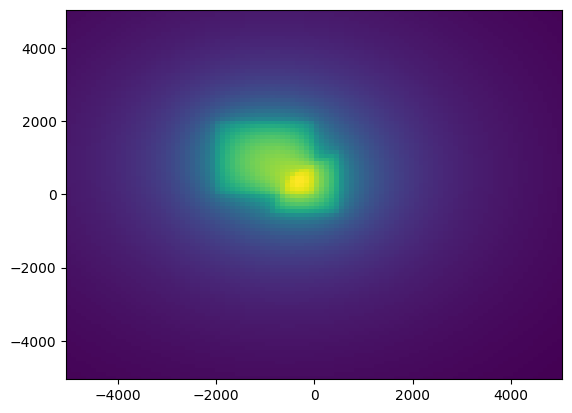

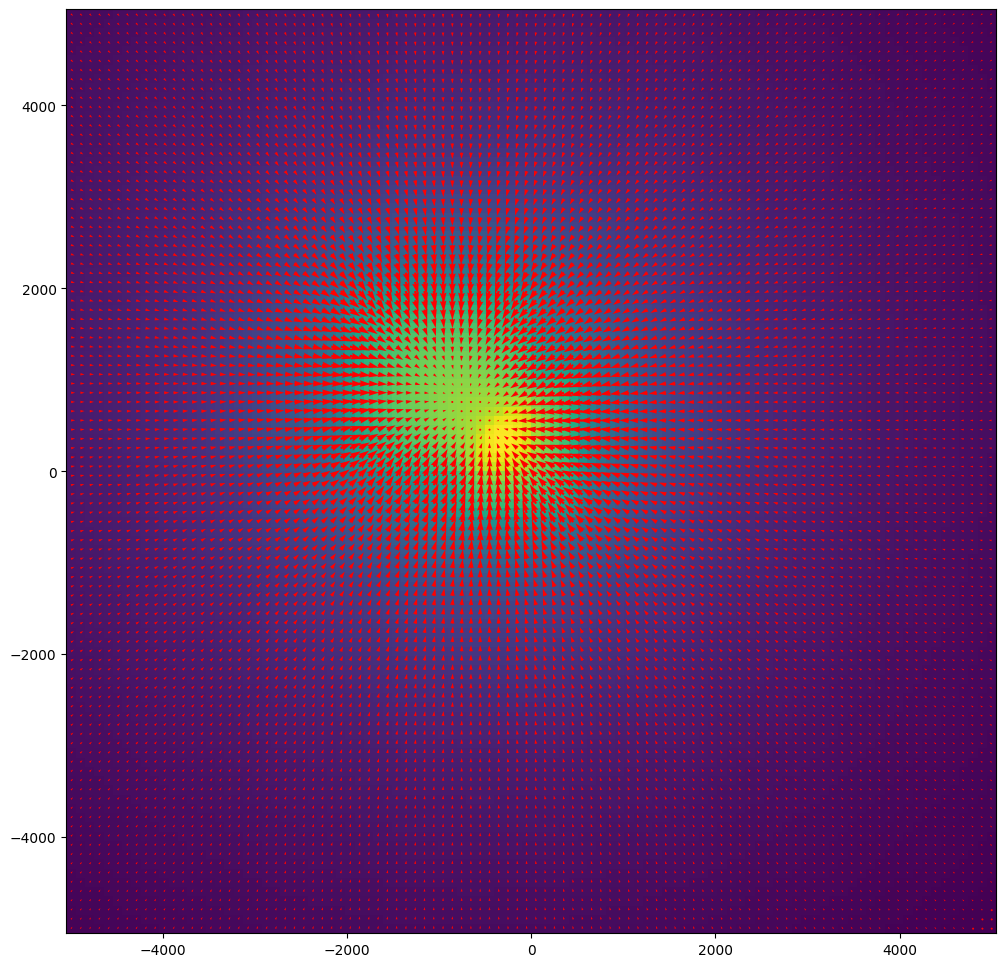

In [5]:
plt.figure()
plt.pcolormesh(xs,ys,Us[:,:,2])

xx, yy = np.meshgrid(xs, ys)

plt.figure(figsize=(12,12))
plt.pcolormesh(xs,ys,Us[:,:,2])#on plot avec meshgrid la daleur déplacement vertical
plt.quiver(xx,yy,Us[:,:,0],Us[:,:,1],color='red')#avec le quiver on affiche les flèches de déplcamenent horizontal

# Test avec focntion qui permet de faire maillage auto 

In [7]:
#################### WHERE THE DISPLACEMENT IS COMPUTED #################"
#providing boundaries and ticks for the general domain  ->
xs = np.linspace(-500, 500, 100)
ys = np.linspace(-500, 500, 100)
z = 0
Us = np.zeros((len(ys), len(xs), 3)) #créé la map des déplacement initialisée à 0 

##################################### DEFINING SOURCES WITH THEIR PARAMETERS #############
ps = np.random.randint(low=0, high=9.81*10*1000, size=(10,10)) #doing 100 sources (10*10 sources) so we need to associate to each vertice its pressure 
Es = 20e9
vs = 0.25
#creating a mesh wtih all sources (100 sources in our case where we use ps of size (10*10)) 
rs = utils.create_source_mesh(-450,450,-450,450,ps) #sources should have part out of the domain in which we compute 

############################ LOOPING OVER SOURCES (SOURCES STORED IN 2D ARRAY TO BE SIMILAR TO GRIDDING OF PRESSURE)######
tim = time.time()

for vx_idx in range(len(ps[0,:])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vy_idx in range(len(ps[:,0])):
        p = ps[vy_idx,vx_idx]
        r = rs[vy_idx,vx_idx]
        with concurrent.futures.ProcessPoolExecutor() as executor:
            futures = []
            #computing the combinations of coordinate points where the displacement will have to be evaluated
            for i, x in enumerate(xs):
                for j, y in enumerate(ys):
                    xyz = [x, y, z]
                    futures.append(executor.submit(load2disp.load2disp, xyz, r, p, E, v))

######### now finally computing the displacement and putting it in Us 
        for i, x in enumerate(xs):
            for j, y in enumerate(ys):
                U = futures.pop(0).result()
                Us[j, i, :] += U.reshape(3)  #we add up the contribution of sources

print('It took',time.time()-tim,f's to compute the displacement at {Us.shape[0]*Us.shape[1]} points for {ps.shape[0]*ps.shape[1]} sources ') #

It took 324.55016446113586 s to compute the displacement at 10000 points for 100 vertices 


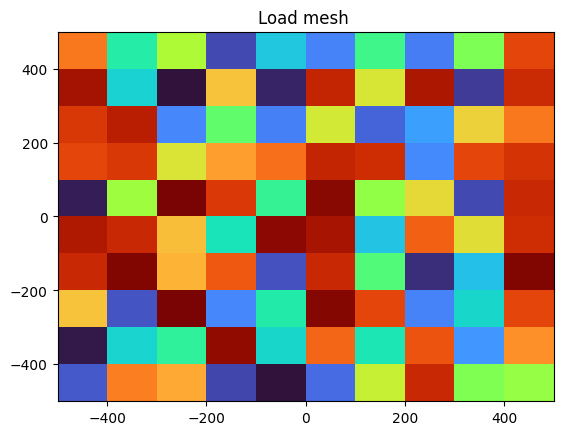

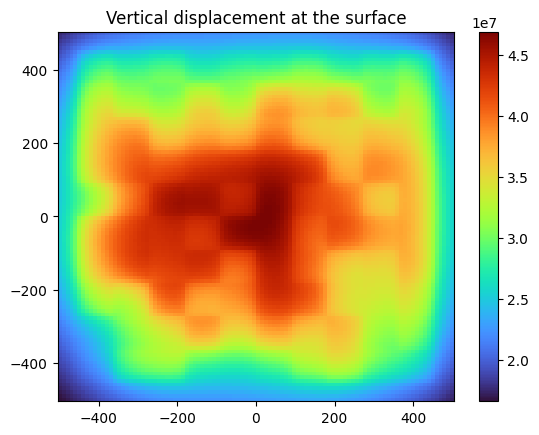

In [8]:
plt.figure()
plt.title("Load mesh ")
plt.pcolormesh(np.linspace(-450,450,10),np.linspace(-450,450,10),ps,cmap='turbo')

plt.figure()
plt.title('Vertical displacement at the surface')
plt.pcolormesh(xs,ys,Us[:,:,2],cmap='turbo')
plt.colorbar()

# Application 3D

- On a a présent de quoi faire un modèle forward assez rapide car on paraléllise l'étape de ou l'on calcule les déplacements sur un maillage régulier sur la carte pour un vertice donné et où on a généré automatiquement des sources pour pouvoir avoir des sources partout sur la carte. 

-> lo'bjectif est d'utiliser les données gps et le modèle forward pour calculer les déplacements attendus à ces positions gps avec notre ensemble de sources sur toute la carte dont chacun a une pression donnée. On va alors utiliser ça différence entre les déplacement théoriques et mesurés comme cost fucntion pour pouvoir inverser les pression de chacun des sources. Une fois que l'on a trouvé les pressions des sources, on pourra alors recalculer le modèle forward de déplacement  avec un maaillage très fin et en utilisant les valeur de pression de chacun des sources obtenues par inversion (en réutilisant le modèle forward ci-dessus par exemple et en plus ça veut dire qu'on pourra calculer le déplacement en profondeur donc pourrait triple boucler sur z !!!). On aura alors le champ de déplacement intégral et ce champ de déplacement on pourra par la suite l'utiliser pour recalculer la déformation en tout point (par diféfrence finie par exemple). En faisant l'hypothèse élastique ? On pourrait faire une relation linéaire entre le tenseur de stress et le tenseur de déformation (peut calculer la déformation ) en multipliant simplement par E ? Une fois que le tenseur de cntrainte est fini en tout point, il faut la possibilité d'ajouter une faille sur le modèle

-> le gros du boulot est sur l'inversion !!

# Calcul de la déformation maintenant que l'on a trouvé les pressions de tous les sources et que l'on est capable de remodéliser les déplacements en forward griddés 
-> doit utiliser modèle 3D

In [10]:
# besoin de sortir une matrice de taille (x*y*z*3*3*) !! giga grosse matrice du coup ! 

On recalcule le déplacement en 3D pour povuoir faire les dérivées selon z

In [59]:
#################### WHERE THE DISPLACEMENT IS COMPUTED #################"
#providing boundaries and ticks for the general domain  ->
xs = np.linspace(-450, 450, 401)
ys = np.linspace(-450, 450, 10)
# zs = np.linspace(0,100,40) #fait de la 3D! 
z = 0
Us = np.zeros((len(ys), len(xs), len(zs),3)) #créé la map des déplacement initialisée à 0 

##################################### DEFINING SOURCES WITH THEIR PARAMETERS #############
ps = np.random.randint(low=0, high=9.81*10*1000, size=(10,10))  
# ps = np.ones((2,2))*9.81*10*1000
E = 75e9
v = 0.25
#creating a mesh wtih all sources (100 sources in our case where we use ps of size (10*10)) 
rs = utils.create_source_mesh(-450,450,-450,450,ps) #sources should have part out of the domain in which we compute 

############################ LOOPING OVER SOURCES (SOURCES STORED IN 2D ARRAY TO BE SIMILAR TO GRIDDING OF PRESSURE)######
tim = time.time()
for vx_idx in range(len(ps[0,:])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vy_idx in range(len(ps[:,0])): 
        p = ps[vy_idx,vx_idx]
        r = rs[vy_idx,vx_idx]
        
        with concurrent.futures.ProcessPoolExecutor() as executor:
            futures = []
            #computing the combinations of coordinate points where the displacement will have to be evaluated
            for i, x in enumerate(xs):
                for j, y in enumerate(ys):
                    # for k, z in enumerate(zs):
                    xyz = [x, y, z]
                    futures.append(executor.submit(load2disp.load2disp, xyz, r, p, E, v))

            ######### now finally computing the displacement and putting it in Us 
            for i, x in enumerate(xs):
                for j, y in enumerate(ys):
                    # for k, z in enumerate(zs):
                    U = futures.pop(0).result()
                    Us[j, i,k,:] += U.reshape(3)  #we add up the contribution of sources

print('It took',time.time()-tim,f's to compute the displacement at {Us.shape[0]*Us.shape[1]*Us.shape[2]} points for {ps.shape[0]*ps.shape[1]} sources ') #

It took 173.29829597473145 s to compute the displacement at 160400 points for 100 sources 


In [60]:
# -> devrait pouvoir calculer POURRAIT BOUCLER SUR LES Z  ET À CHAQUE Z FAIRE LE PRODUIT G PS -> pas contre requiert de changer la 
#fonction build G pour permettre de faire z != 0 

l = E * v / ((1 + v) * (1 - 2 * v))
m = E / (2 * (1 + v))    

pos_number = len(xs)*len(ys)

xs_adapted = np.zeros(pos_number)
ys_adapted = np.zeros(pos_number)
Us_reshaped = np.zeros((pos_number,3))


t1 = time.time()

idx = 0
for y in ys:
    for x in xs:
        ys_adapted[idx] = y
        xs_adapted[idx] = x
        idx+=1


data_number = len(Us_reshaped[0,:])*len(Us_reshaped[:,0])
source_number = len(ps[0,:])*len(ps[:,0])
Us_formatted = Us_reshaped.reshape(data_number,1)
G = disp2load.build_G(rs,xs_adapted,ys_adapted,data_number,l,m)

t2 = time.time()

print('G built in ', t2-t1)

ps = ps.reshape(source_number,1)

Us_cal = G@ps
print('G ps computed in ',time.time()-t2)
Us_cal = Us_cal.reshape((len(Us_reshaped[:,0]),len(Us_reshaped[0,:])))
Us_cal = Us_cal.reshape(len(ys),len(xs),3)


G built in  121.76986312866211
G ps computed in  0.0020291805267333984


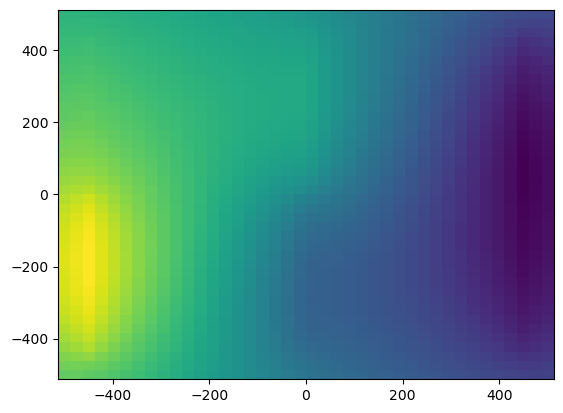

In [51]:
plt.figure() #carte avec déplacement à la surface
plt.pcolormesh(ys,xs,Us_cal[:,:,0])

# plt.pcolormesh(Us[:,:,0,0])

# plt.scatter(xs_adapted,ys_adapted,c=Us_cal[:,0])

Maintenant on va calculer le strain tensor en tout point !! (sauf aux bords -> peut être faire euler forward en z pour pouvoir calculer déformation à la surface...)

## Strain tensor computation

In [9]:
dx = xs[1]-xs[0]
dy = ys[1]-ys[0]
dz = zs[1]-zs[0]

strain_matrix = np.zeros((len(ys),len(xs),len(zs),3,3)) #on pourra pas calculer le strain dans les points aux bords avec notre implémentation -> pourrait faire euler forward sii on veut pouvoir avoir 
#la déformation à la surface... 

############################ LOOPING OVER SOURCES (SOUCRES STORED IN 2D ARRAY TO BE SIMILAR TO GRIDDING OF PRESSURE)######
tim = time.time()

with concurrent.futures.ProcessPoolExecutor() as executor:
    futures = []
    #computing the different combinations of Up to feed in order to compute the strain at each point -> chaque point on feed les composantes de U aux points suivant et précédent selon les 3 composantes = 6 valeurs à donner
    for i in range(1,len(xs)-1):
        for j in range(1,len(ys)-1):
            for k in range(1,len(zs)-1):
                Up = np.array([[Us[j,i-1,k,0],Us[j,i+1,k,0]], #ligne ou on met les déplacement dans direction x 
                               [Us[j-1,i,k,1],Us[j+1,i,k,1]], #ligne déplacement direction y
                               [Us[j,i,k-1,2],Us[j,i,k+1,2]]]) #ligne déplacent en z 
                futures.append(executor.submit(utils.compute_strain_tensor_at_point,Up,dx,dy,dz))

    ######### now finally computing the displacement and putting it in Us 
    for i in range(1,len(xs)-1):
        for j in range(1,len(ys)-1):
            for k in range(1,len(zs)-1):
                strain = futures.pop(0).result()
                strain_matrix[j,i,k,:] = strain.reshape(3,3)  

print('Took ', time.time()-tim, f's to compute {strain_matrix.shape[0]*strain_matrix.shape[1]*strain_matrix.shape[2]} strain tensors') #

Took  18.885416507720947 s to compute 64000 strain tensors


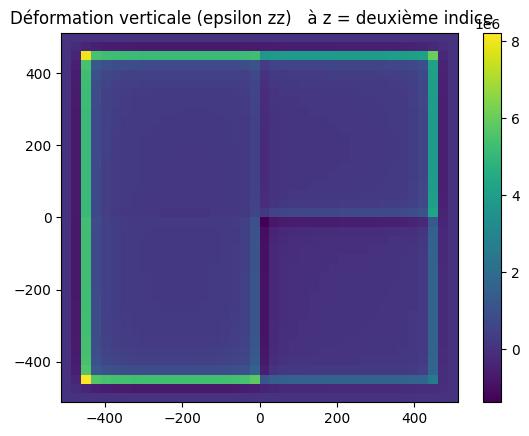

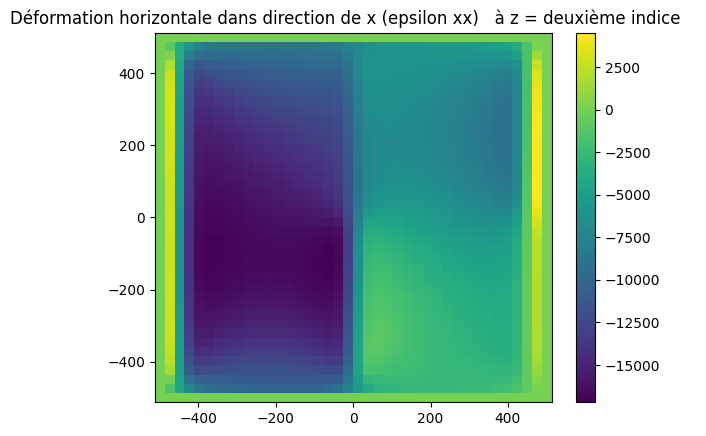

In [10]:
plt.figure()
plt.title('Déformation verticale (epsilon zz)   à z = deuxième indice   ')
plt.pcolormesh(ys,xs,strain_matrix[:,:,1,2,2]) #affiche la carte horizontale à l'index 1 (premier index ou calculé dans la direction z)  de epsilon zz 
plt.colorbar()
#on voit que la déformation est maximale en périphérique du bloc  (négative ou positive )  !!! 

plt.figure()
plt.title('Déformation horizontale dans direction de x (epsilon xx)   à z = deuxième indice   ')
plt.pcolormesh(ys,xs,strain_matrix[:,:,1,0,0]) #affiche la carte horizontale à l'index 1 (premier index ou calculé dans la direction z)  de epsilon zz 
plt.colorbar() #déplacement en x fait bien vers la droite à gauche dt vers la gauche à droite  du coup ça fait forte slope dans le déplacement au milieu et par contre plateau sur 
#côtés du coup quand fait dérivée selon x,  ça fait valeur négative constante au milieu + 0 sur les bords 



Maintenant que l'on a les tenseurs de contrainte en tout point, il nous suffit de calculer d'utiliser l'hypothèse élastique et on fait x E pour avoir sigma:

## Stress tensor computation

In [11]:
E = 1 # 20e9
stress_matrix = E*strain_matrix
print(stress_matrix.shape) #shape y*x*z * tensor

(40, 40, 40, 3, 3)


Maintenant que l'on a tous les stress tensors, il faudrait être capable de placer la faille dans le mesh pour ensuite faire la rotation rotation des tenseurs de de contrainte et en appliquer la formule pour calculer le stress de coulomb associé 

## Defining the fault and matrixrotation

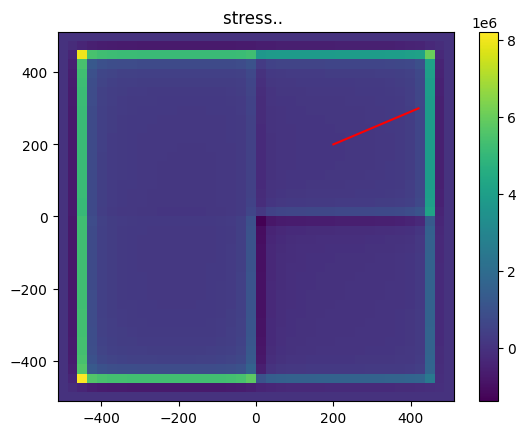

In [12]:
#on défini la faille comme un plan vertical pour le moment -> on connait ainsi aisément o
#des pistes pour une généralisation avec des points discrets pour modéliser la faille ont déjàé été initiées sur le jupyter hub 

#coordonnées de la faille 
xf = [200,420]
yf = [200,300] 

#calcul de l'azimuth de la daille
az = np.arctan((xf[1]-xf[0])/(yf[1]-yf[0]))
az = np.pi/2

# rotation d'un tenseur de contrainte :
rot_z = np.array([[np.cos(-az), -np.sin(-az), 0],
                   [np.sin(-az), np.cos(-az), 0],
                    [0, 0, 1]])

# Reshape the large_array to (40*40*40, 3, 3)
reshaped_stress_matrix = stress_matrix.reshape(-1, 3, 3)

# Perform matrix multiplication between the 3x3 matrix and all matrices in the reshaped array
result = np.matmul(rot_z,reshaped_stress_matrix)  #à voir si ça a bien fait 

# Reshape the result back to the original shape (40, 40, 40, 3, 3)
rotated_stress_matrix = result.reshape(40, 40, 40, 3, 3)


plt.figure()
plt.title('stress.. ')
plt.pcolormesh(ys,xs,rotated_stress_matrix[:,:,1,2,2])
plt.plot(xf,yf,color='red')
plt.colorbar()


Maintenant que dait la rotation, la direction x devrait être la direction normale au plan et les directions z et y devraient être tangentes au plan. On devrait ainsi à présent pouvoir calculer le stress de coulomb 

## Coulomb stress computation

(40, 40, 40)


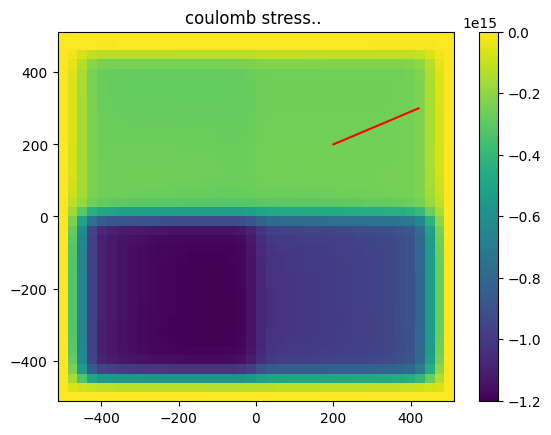

In [14]:
#calcul du stress de coulomb  -> pusique on a  ortated  xx est normal et xy et xz est 

friction_coeff = 1

coulomb_sress_matrix = rotated_stress_matrix[:,:,:,0,1] +friction_coeff*rotated_stress_matrix[:,:,:,0,0]

print(coulomb_sress_matrix.shape)

plt.figure()
plt.title('coulomb stress.. ')
plt.pcolormesh(ys,xs,coulomb_sress_matrix[:,:,1])
plt.plot(xf,yf,color='red')
plt.colorbar()


# Test pour comparer l'implémentation avec le résultat obtenu par Elósegui, 2003

### on commence par faire une matrice avec la même géométrie qeudleur modèle (2 cercles)

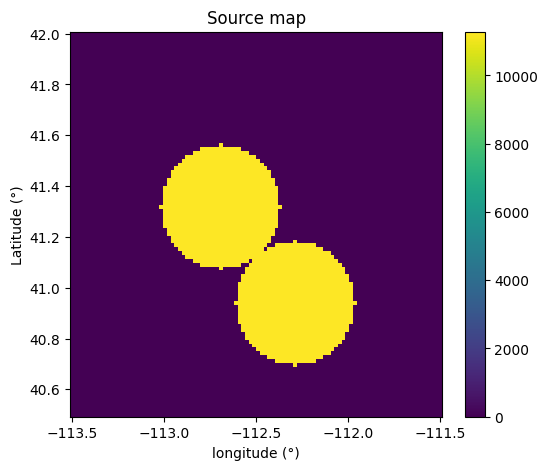

In [74]:
#on doit faire matrice avec la géométrie fournie
ps = np.zeros((100,100))

def compute_distance(xc,yc,x,y):
    return np.sqrt((xc-x)**2+(yc-y)**2)

ic = int(61*len(ps[:,0])/150)
jc = int(82*len(ps[:,0])/150)
r = int(24*len(ps[:,0])/150)


for j in range(len(ps[0,:])):
    for i in range(len(ps[0,:])):
        distance = compute_distance(ic,jc,i,j)
        if  distance <= r:
            ps[j,i] = 1 
            
ic = int(90*len(ps[:,0])/150)
jc = int(44*len(ps[:,0])/150)

for j in range(len(ps[0,:])):
    for i in range(len(ps[0,:])):
        distance = compute_distance(ic,jc,i,j)
        if distance <= r:
            ps[j,i] = 1 

ps *= 1150*1*9.81
            
plt.figure(figsize=(6,5))
plt.title('Source map')
plt.xlabel('longitude (°)')
plt.ylabel('Latitude (°)')
plt.pcolormesh(np.linspace(-113.5,-111.5,100), np.linspace(40.5,42,100),ps)
plt.colorbar()
plt.locator_params(nbins=6,axis='x')
# plt.savefig('source_map.png',bbox_inches='tight',dpi=300)

### On converti les coordonnées en cartésien histoire de travailler avec une source qui est bien scalée

In [76]:

latitude = 40.5  # Replace with your latitude
longitude = -113.5  # Replace with your longitude

x, y = lat_lon_to_xy(latitude, longitude)
print(f"Latitude: {latitude}, Longitude: {longitude}")
print(f"X: {x}, Y: {y}")


latitude = 42.0  # Replace with your latitude
longitude = -111.5  # Replace with your longitude

x, y = lat_lon_to_xy(latitude, longitude)
print(f"Latitude: {latitude}, Longitude: {longitude}")
print(f"X: {x}, Y: {y}")

EPSG:32612
Latitude: 40.5, Longitude: -113.5
X: 288154.7089331738, Y: 4486257.351409613
EPSG:32612
Latitude: 42.0, Longitude: -111.5
X: 458591.13334707794, Y: 4649897.125140672


### On donne la bonne pression aux cellules et on produit ensuite le mesh (attention )

In [31]:
#on va faire le même exmemple qu'il avait fait  -> on fait deux cercle d'épaisseur de 1 m avec eau de densité = 1150 kg / m³ et 

rs = utils.create_source_mesh(288154.7089331738,458591.13334707794,4486257.351409613,4649897.125140672,ps) #sources should have part out of the domain in which we compute 

np.save('ps_mathis.npy',ps)
np.save('rs_mathis.npy',rs)

### Une fois que l'on a fait tourner le modèle, on récupère l'output, mais faut déjà convertir les coordonnées des bouts du domaine en lat lon ! 

In [77]:
### replace les coordonnées xy donénes pour le domaine de calcul par les coordonnées gps  donc doit faire conversion

x = 288000  # Replace with your X coordinate
y = 4486000  # Replace with your Y coordinate

latitude, longitude = xy_to_lat_lon(x, y, zone='EPSG:32612')
print(f"X: {x}, Y: {y}")
print(f"Latitude: {latitude}, Longitude: {longitude}")

x = 459000  # Replace with your X coordinate
y = 4650000  # Replace with your Y coordinate

latitude, longitude = utils.xy_to_lat_lon(x, y, zone='EPSG:32612')
print(f"X: {x}, Y: {y}")
print(f"Latitude: {latitude}, Longitude: {longitude}")

X: 288000, Y: 4486000
Latitude: 40.49764423169397, Longitude: -113.5017379819835
X: 459000, Y: 4650000
Latitude: 42.000947921769786, Longitude: -111.49507041522365


### Maintenant on peut plot vu qu'on a converti les coordonnées 

In [128]:
#il faudrait surement utiliser une projection carto qui ne fonctionne qu'avec des X et Y en local histoire que l'on puisse convertir 
#en retour assez facilement 

#### ICI IL FAUDRAIT CONVERTIR LES COORDOONÉES  XY EN LON LAT 

lon  = np.linspace(-113.5017379819835,-111.49507041522365,200) 
lat = np.linspace(40.49764423169397,42.000947921769786,200)  
XX, YY = np.meshgrid(lon,lat)

# Us = np.load('/home/parisnic/project/disp2load/run_verif2/source_line_full.npy')
Us = np.load('/home/parisnic/Documents/M2/S1/project/disp2load/run_verif2/source_line_full.npy')


reduction_factor = 18  # Adjust this to your preference

# Create a subset of the vectors
x_subset = Us[::reduction_factor, ::reduction_factor,0,0]
y_subset = Us[::reduction_factor, ::reduction_factor,0,1]


#plotting the result 
plt.figure(figsize=(12,10))
plt.contourf(lon,lat,Us[:,:,0,2])
plt.colorbar()
plt.locator_params(nbins=6,axis='x')
plt.quiver(XX[::reduction_factor, ::reduction_factor],YY[::reduction_factor, ::reduction_factor],x_subset,y_subset, scale=0.02)
# plt.savefig('displacement_computed',bbox_inches='tight',dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: '/home/parisnic/Documents/M2/S1/project/disp2load/run_verif2/source_line_full.npy'

# test avec seulement deux sources circulaires

In [9]:
latitude = 40.5  
longitude = -113.5 

x, y = utils.latlon2xy(latitude, longitude, projection_type='utm', zone=11, ellps='WGS84')
print(f"Latitude: {latitude}, Longitude: {longitude}")
print(f"X: {x}, Y: {y}")


latitude = 42.0
longitude = -111.5

x, y = utils.latlon2xy(latitude, longitude, projection_type='utm', zone=11, ellps='WGS84')
print(f"Latitude: {latitude}, Longitude: {longitude}")
print(f"X: {x}, Y: {y}")


Latitude: 40.5, Longitude: -113.5
X: 796597.6776222109, Y: 4489142.09801099
Latitude: 42.0, Longitude: -111.5
X: 955570.5840092768, Y: 4664431.1597721055


(827860.1715507859, 927612.9799032063, 4510807.711518366, 4618192.687126653)

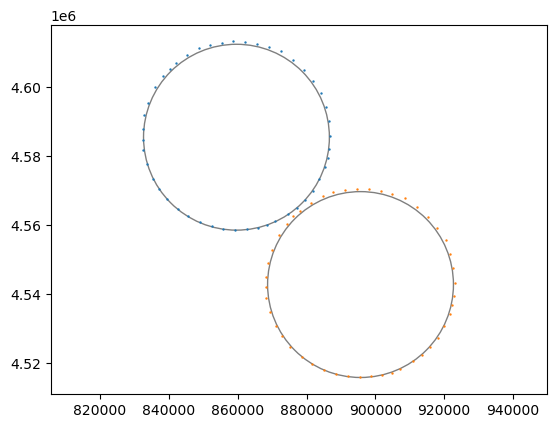

In [10]:
import matplotlib.patches as patches

def polar_angle(x, y):
        return np.arctan2(y - center_y, x - center_x)
rs = np.zeros((2,47,2))

center_save = np.zeros((2,2))  

#on met 2 sources, sauf qu'on a gardé en coordonnées GPS quand on a fait les mesure le long du cercle, donc faut convertir chaque point en cartesien
for j in range(len(rs[:,0,0])): 
    s = pd.read_csv(f's{j}_coord.csv')
    lon_coordinates = s['lon'].values
    lat_coordinates = s['lat'].values
    #### converting the lat lon coordinates of each point to x y coordinates !
    x_coordinates = np.zeros(len(lon_coordinates))
    y_coordinates = np.zeros(len(lat_coordinates))
    for i in range(len(x_coordinates)):
        x_coordinates[i], y_coordinates[i] = utils.latlon2xy(lat_coordinates[i], lon_coordinates[i], zone=11)
    # Step 1: Calculate the center of the circle
    center_x = np.mean(x_coordinates)
    center_y = np.mean(y_coordinates)
    center_save[j,:] = [center_x, center_y] 
    # Step 3: Sort the coordinates by polar angle
    sorted_indices = np.argsort(polar_angle(x_coordinates, y_coordinates))
    x_sorted = x_coordinates[sorted_indices]
    y_sorted = y_coordinates[sorted_indices]
    #now we can put everythindtogether to make r 
    r = np.concatenate((x_sorted.reshape(len(x_sorted),1),y_sorted.reshape(len(y_sorted),1)),axis=1)
    rs[j,:,:] = r
                 
#### adding the patches
fig, ax = plt.subplots()
circle = patches.Circle(center_save[0,:], 27000, fill=False,alpha=0.5)
ax.add_patch(circle)
circle = patches.Circle(center_save[1,:], 27000, fill=False,alpha=0.5)
ax.add_patch(circle)
        
#showing the points used to make the circular sources
ax.scatter(rs[0,:,0],rs[0,:,1],s=0.5)
# for i in range(len(rs[0,:,0])):
    # plt.text(rs[0,i,0],rs[0,i,1],f'{i}')
    
ax.scatter(rs[1,:,0],rs[1,:,1],s=0.5)
# for i in range(len(rs[1,:,0])):    
    # plt.text(rs[1,i,0],rs[1,i,1],f'{i}')

plt.axis('equal')    


In [13]:
xs = np.linspace(796597.6776222109, 955570.5840092768, 100)
ys = np.linspace(4489142.09801099,4664431.1597721055, 100)
z = 0
Us = np.zeros((len(ys), len(xs), 3))

#defining the region where pressure is applied
p = 9.81*1150
E = 100e9
v = 0.25

######### now finally computing the displacement and putting it in Us 
for r in rs:
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            xyz = [x, y, z]
            U = load2disp.load2disp( xyz, r, p, E, v)
            Us[j, i, :] += U.reshape(3) 


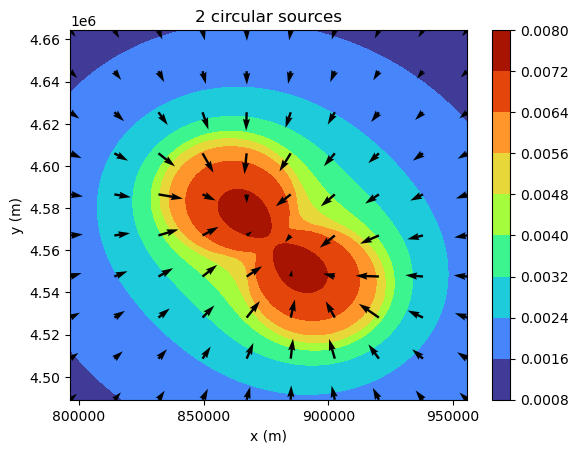

In [15]:
XX, YY = np.meshgrid(xs,ys) 

reduction_factor = 11  # Adjust this to your preference

# Create a subset of the vectors
x_subset = Us[::reduction_factor, ::reduction_factor,0]
y_subset = Us[::reduction_factor, ::reduction_factor,1]


plt.figure()
plt.title('2 circular sources')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.contourf(xs,ys,Us[:,:,2], cmap='turbo')
plt.locator_params(nbins=6,axis='x')
plt.colorbar()
plt.quiver(XX[::reduction_factor, ::reduction_factor],YY[::reduction_factor, ::reduction_factor],x_subset,y_subset, scale=0.02)


# Test avec true source

### 1 seule source complexe 

In [75]:
s = pd.read_csv(f'true_source.csv')
lat_coordinates = s['lat'].values
lon_coordinates = s['lon'].values

x_coordinates = np.zeros(len(lon_coordinates))
y_coordinates = np.zeros(len(lat_coordinates))
x_coordinates, y_coordinates = utils.latlon2xy(lat_coordinates, lon_coordinates, zone=11)

#on a maintenant les coordonnées des points, il nous suffit de former la matrice 
r = np.zeros((len(x_coordinates),2))
r[:,0] = x_coordinates
r[:,1] = y_coordinates

plt.plot(r[:,0],r[:,1])

In [79]:
xstart, ystart = utils.latlon2xy(40.5,-113.5,zone=11)
xend, yend = utils.latlon2xy(42,-111.5,zone=11)

xs = np.linspace(xstart, xend, 100)
ys = np.linspace(ystart, yend, 100)
z = 0
Us = np.zeros((len(ys), len(xs), 3))
    
E = 75e9
v = 0.25
p = 9.81*1150

######### now finally computing the displacement and putting it in Us 
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        xyz = [x, y, z]
        U = load2disp.load2disp( xyz, r, p, E, v)
        Us[j, i, :] += U.reshape(3) 

796597.6776222109 955570.5840092768 4489142.09801099 4664431.1597721055


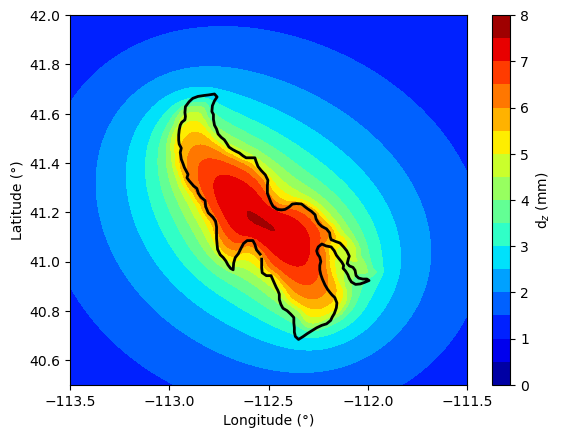

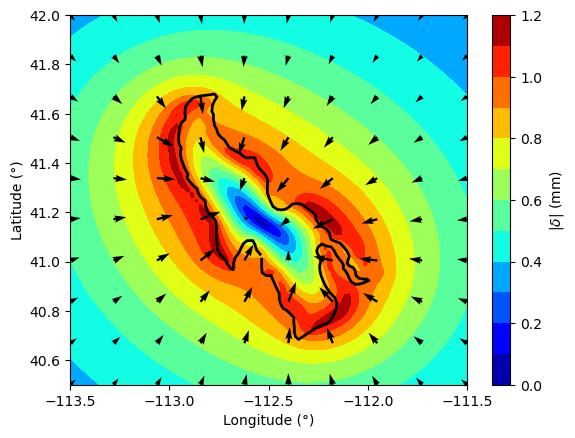

In [94]:
#need to convert xs and ys to lats and lon back so that we have a map similar to theirs
lats, lons = utils.xy2latlon(xs,ys,zone=11)

XX, YY = np.meshgrid(lons,lats) 

reduction_factor = 11  # Adjust this to your preference

# Create a subset of the vectors
x_subset = Us[::reduction_factor, ::reduction_factor,0]
y_subset = Us[::reduction_factor, ::reduction_factor,1]

levels = np.arange(0,8.5,0.5)

plt.figure()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.contourf(lons,lats,Us[:,:,2]*1000,levels=levels, cmap='jet')
plt.locator_params(nbins=6,axis='x')
cbar= plt.colorbar()
cbar.set_label(r'd$_z$ (mm)')
plt.plot(lon_coordinates,lat_coordinates, color='black',linewidth=2)
plt.savefig('benchmark_fwd_2D_vertical.pdf',bbox_inches='tight',dpi=300)

levels = np.arange(0,1.3,0.1)

plt.figure()
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.contourf(lons,lats,np.sqrt( (Us[:,:,1]*1000)**2 + (Us[:,:,0]*1000)**2 ),levels=levels, cmap='jet')
plt.locator_params(nbins=6,axis='x')
cbar=  plt.colorbar()
cbar.set_label(r'$|\delta|$ (mm)')
plt.plot(lon_coordinates,lat_coordinates, color='black',linewidth=2)
plt.quiver(XX[::reduction_factor, ::reduction_factor],YY[::reduction_factor, ::reduction_factor],x_subset,y_subset, scale=0.02)
plt.savefig('benchmark_fwd_2D_horizontal.pdf',bbox_inches='tight',dpi=300)


### multittude de sources simples

In [26]:
s = pd.read_csv(f'true_source.csv')
lat_coordinates = s['lat'].values
lon_coordinates = s['lon'].values

x_coordinates = np.zeros(len(lon_coordinates))
y_coordinates = np.zeros(len(lat_coordinates))
contour = np.zeros((len(x_coordinates),2))

for i in range(len(x_coordinates)):
    x_coordinates[i], y_coordinates[i] = utils.lat_lon_to_xy(lat_coordinates[i], lon_coordinates[i])
    contour[i] = (x_coordinates[i],y_coordinates[i])

print(contour[0:5])

[[ 370896.52260181 4540989.16725612]
 [ 370857.94385597 4538795.19267705]
 [ 370827.09197095 4537040.01805834]
 [ 371008.57653323 4534842.19382071]
 [ 372746.09077586 4533495.16100627]]


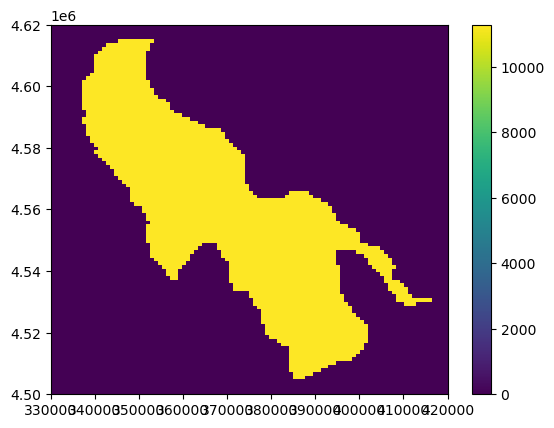

In [29]:
def is_point_inside_polygon(polygon, x, y):
    """Function that allows to determine if a point is inside a polygon : useful to map the pressure distribution front contours """
    n = len(polygon)
    inside = False
    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside


### we must create the pressure distribution map -> need to 
ps = np.zeros((100,100))
rs = utils.create_source_mesh(330000,420000,4.5e6,4.62e6,ps) #sources should have part out of the domain in which we compute 
xr = np.linspace((rs[0,0,1,0]+rs[0,0,0,0])/2, (rs[0,-1,0,0]+rs[0,-1,1,0])/2 ,len(ps[0,:]))
yr = np.linspace((rs[0,0,3,1]+rs[0,0,0,1])/2, (rs[-1,0,3,1]+rs[-1,0,0,1])/2, len(ps[:,0])) #les 


for j in range(len(ps[:,0])):
    for i in range(len(ps[0,:])):
        result = is_point_inside_polygon(contour, xr[i], yr[j])
        if result == True:
            ps[j,i] = 1 

ps *= 1150*1*9.81


plt.pcolormesh(xr,yr,ps)
plt.colorbar()
plt.savefig('sources.pdf', dpi=300, bbox_inches='tight')

In [4]:
#maintenant que l'on a ps, on peut calculer le déplacement en tous le spoints suhaités 

E = 75e9
v = 0.25

nsta = 100
xs = np.random.randint(330000, high=420000, size=nsta) #les x des stations
ys =  np.random.randint(4.5e6, high=4.62e6, size=nsta) #les y des stations 

z = 0 #va mettre toutes les stations à 0 m
Us = np.zeros((len(xs), 3)) #on va faire seulement une ligne de displaements dans ce cas car on a pas des mesures régulières !

for vy_idx in range(len(ps[:,0])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vx_idx in range(len(ps[0,:])): 
        p = ps[vy_idx,vx_idx]
        if p!=0: #si p =0 alors pas besoin de calculer l'influence de cette source car nulle 
            r = rs[vy_idx,vx_idx]
            for i in range(nsta):
                xyz = [xs[i], ys[i], z]
                U = load2disp.load2disp( xyz, r, p, E, v)
                Us[i, :] += U.reshape(3)
                

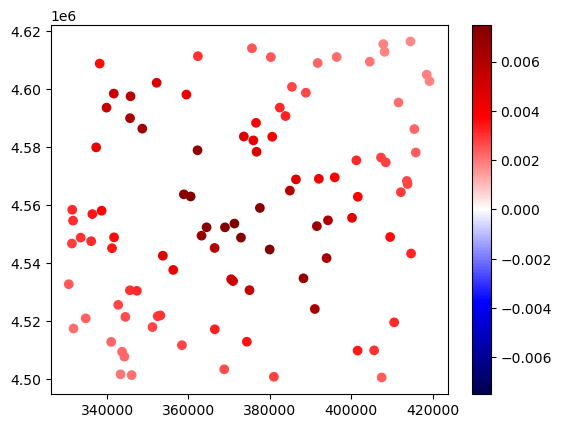

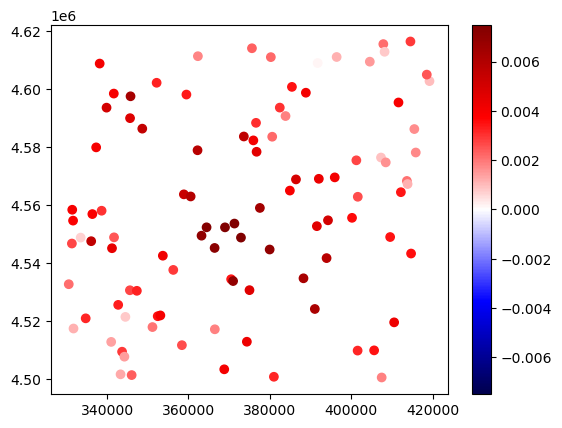

In [5]:
#On rajoute à présent du bruit sur le déplacement 

plt.figure()
plt.scatter(xs,ys,c=Us[:,2],label='z displacement', vmax=np.max(np.abs(Us[:,2])), vmin = -np.max(np.abs(Us[:,2])), cmap='seismic') 
plt.colorbar()
# plt.legend()


Us_noisy = Us.copy()
Us_noisy[:,0:2] += np.random.normal( loc=0.0, scale=0.001, size=Us[:,0:2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 
Us_noisy[:,2] += np.random.normal( loc=0.0, scale=0.001, size=Us[:,2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 

plt.figure()
plt.scatter(xs,ys,c=Us_noisy[:,2],label='z displacement', vmax=np.max(np.abs(Us[:,2])), vmin = -np.max(np.abs(Us[:,2])), cmap='seismic') 
plt.colorbar()

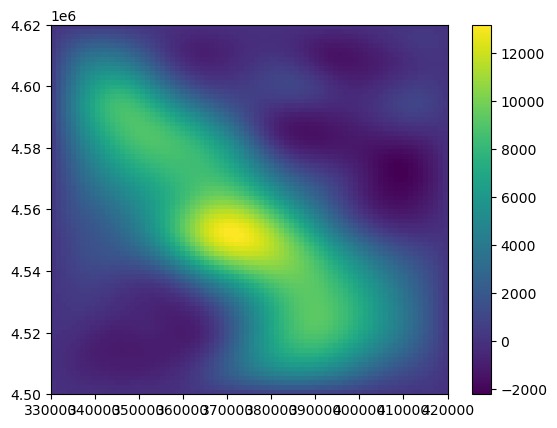

In [12]:
#on peut décider de lui donner plus ou moins de sources pour l'inversioon -> puisque on choisi le nombre de source qu'on souhaite utiliser dans notre pb

ny = 80
nx = 80
rs4inversion =  utils.create_source_mesh(330000,420000,4.5e6,4.62e6,np.zeros((ny,nx))) #sources should have part out of the domain in which we compute 
xr = np.linspace((rs4inversion[0,0,1,0]+rs4inversion[0,0,0,0])/2, (rs4inversion[0,-1,0,0]+rs4inversion[0,-1,1,0])/2 ,nx)
yr = np.linspace((rs4inversion[0,0,3,1]+rs4inversion[0,0,0,1])/2, (rs4inversion[-1,0,3,1]+rs4inversion[-1,0,0,1])/2, ny) #les 


ps_inverted = disp2load.disp2load(E,v,rs4inversion,xs,ys,Us_noisy,mode=1, alpha=1, epsilon=1e-6, gamma_coeff=1e-2)
plt.pcolormesh(xr,yr,ps_inverted)
plt.colorbar()

In [12]:
print(np.mean(ps_inverted))

print(np.mean(ps))

3030.020202141858
3027.9546


# implémentation du problème inverse 

calcul des déplacements liés à une source synthétique (assemblage de petites sources)

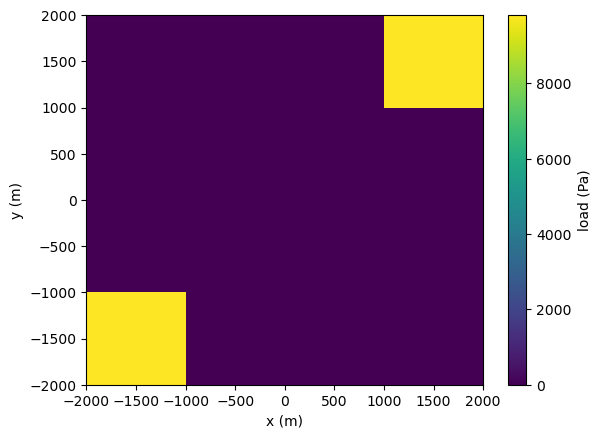

In [6]:
#on va partir de quelques déformations et on va devoir retrouver la distribution de pressions sans régularizaiton 

xs = np.random.randint(-2000, high=2000, size=50) #les x des stations
ys =  np.random.randint(-2000, high=2000, size=50) #les y des stations 
z = 0 #va mettre toutes les stations à 0 m
Us = np.zeros((len(xs), 3)) #on va faire seulement une ligne de displaements dans ce cas car on a pas des mesures régulières !

#defining the region where pressure is applied
r = np.array([[-500., -1000.], [500., -1000.], [500., 1000.], [-500., 1000.]])
p = 9.82*10**5
E = 0.6e11
v = 0.25

###### pour pouvoir faire la version avec plusieurs sources au lieu d'une seule source
ps = np.zeros((8,8))
# ps[2:-2,3:-3] =  9.82*10**5
# ps[2:-2,0:3] = 9.82*10**5

#plus complexe source 
# ps[2:-4,2:-2] =  9.82*10**5
# ps[2:-3,3:-3] =  9.82*10**5
# ps[4:-2,4:-3] =  9.82*10**5


#source sur côté 
ps[0:2,0:2] = 9.81*10**3
ps[-2:,-2:] = 9.81*10**3


rs = utils.create_source_mesh(-2000,2000,-2000,2000,ps)

plt.figure()
plt.pcolormesh(np.linspace(-1750,1750,8),np.linspace(-1750,1750,8),ps)
cbar = plt.colorbar()
cbar.set_label('load (Pa)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

for vy_idx in range(len(ps[:,0])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vx_idx in range(len(ps[0,:])): 
        p = ps[vy_idx,vx_idx]
        if p!=0: #si p =0 alors pas besoin de calculer l'influence de cette source car nulle 
            r = rs[vy_idx,vx_idx]
            for i, x in enumerate(xs):
                xyz = [xs[i], ys[i], z]
                U = load2disp.load2disp( xyz, r, p, E, v)
                Us[ i, :] += U.reshape(3)

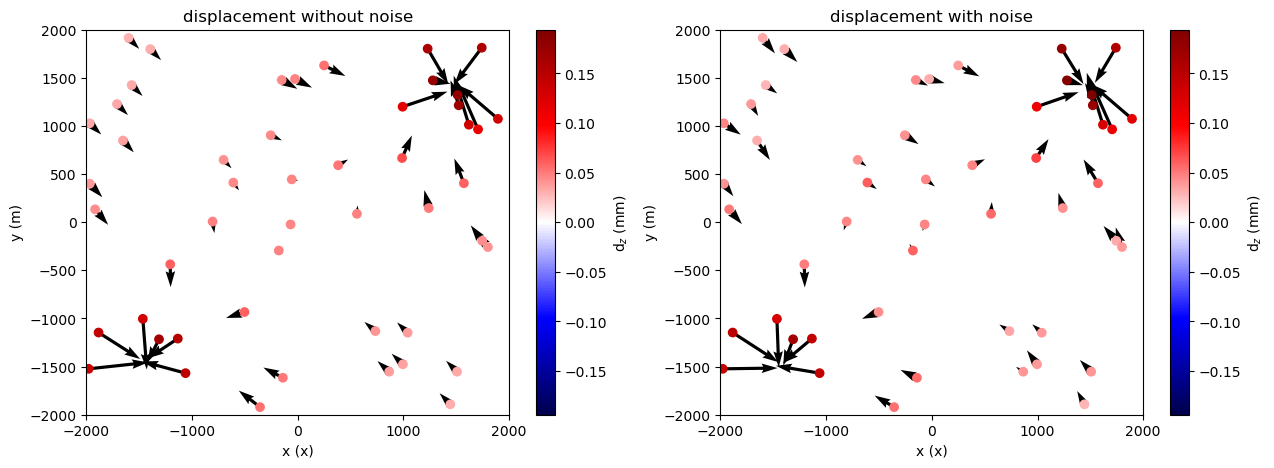

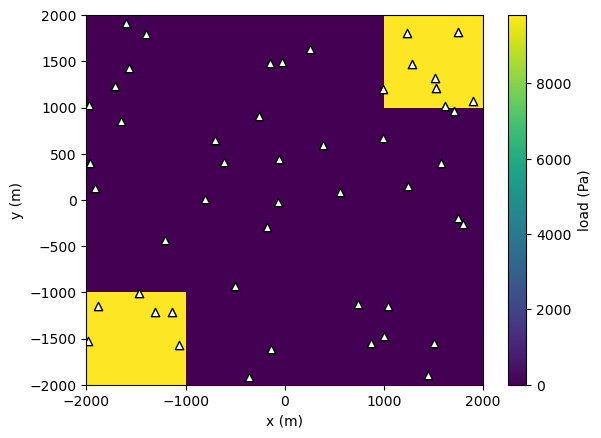

In [7]:
#On rajoute à présent du bruit sur le déplacement 
Us_noisy = Us.copy()
Us_noisy[:,0:2] += np.random.normal( loc=0.0, scale=0.05*np.max(np.abs(Us[:,0:2])), size=Us[:,0:2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 
Us_noisy[:,2] += np.random.normal( loc=0.0, scale=0.05*np.max(np.abs(Us[:,2])), size=Us[:,2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 

#on pourrait mettre un niveau de bruit plus fort sur composante verticale  et même lui donner une valeur de bruit qui est logique  avec ce qui s'observe ...
vmaxus = np.max(np.abs(Us[:,2]*1000))
vmaxus_noisy = np.max(np.abs(Us_noisy[:,2]*1000))
vmax = np.max([vmaxus,vmaxus_noisy])


arrow_coeff = 100000

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.quiver(xs, ys, Us[:,0]*arrow_coeff, Us[:,1]*arrow_coeff, color='black')
im = ax1.scatter(xs,ys,c=Us[:,2]*1000,label='z displacement', vmax=vmax, vmin=-vmax, cmap='seismic') 
cbar = plt.colorbar(im)
cbar.set_label(r'd$_z$ (mm) ')
ax1.set_title('displacement without noise')
ax1.set_ylabel('y (m)')
ax1.set_xlabel('x (x)')
ax1.locator_params(nbins=6,axis='x')
ax1.set_xlim(-2000,2000)
ax1.set_ylim(-2000,2000)


ax2.quiver(xs, ys, Us_noisy[:,0]*arrow_coeff, Us_noisy[:,1]*arrow_coeff, color='black')
im = ax2.scatter(xs,ys,c=Us_noisy[:,2]*1000,label='z displacement', vmax=vmax, vmin = -vmax, cmap='seismic') 
cbar = plt.colorbar(im)
cbar.set_label(r'd$_z$ (mm) ')
ax2.set_title('displacement with noise')
ax2.set_ylabel('y (m)')
ax2.set_xlabel('x (x)')
ax2.locator_params(nbins=6,axis='x')
ax2.set_xlim(-2000,2000)
ax2.set_ylim(-2000,2000)

# plt.savefig('displacement_simple_source_low_noise.pdf',dpi=300, bbox_inches='tight')

plt.figure()
plt.pcolormesh(np.linspace(-1750,1750,8),np.linspace(-1750,1750,8),ps)
cbar = plt.colorbar()
cbar.set_label('load (Pa)')
plt.scatter(xs,ys,marker='^',linewidths=1, edgecolors='black', color='white')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.locator_params(nbins=6,axis='x')
# plt.savefig('simple_source.pdf',dpi=300,bbox_inches='tight')


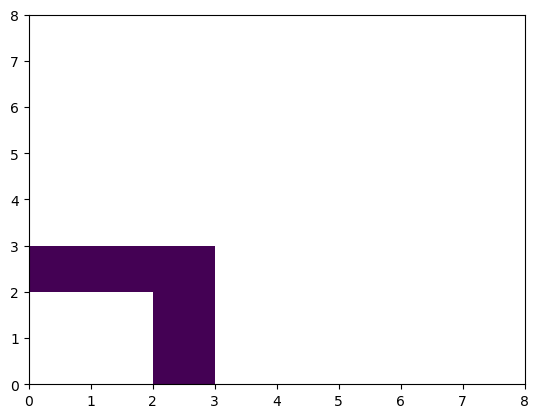

In [8]:
constraint = np.empty((8,8))
constraint[:,:] = np.nan 
constraint[0:3,2:3] = 0
constraint[2:3,0:3] = 0
plt.pcolormesh(constraint) #prodigue une constrainte qui sera utilisée avec le scheme itératif

1.3161513805389404


Text(0, 0.5, 'y (m)')

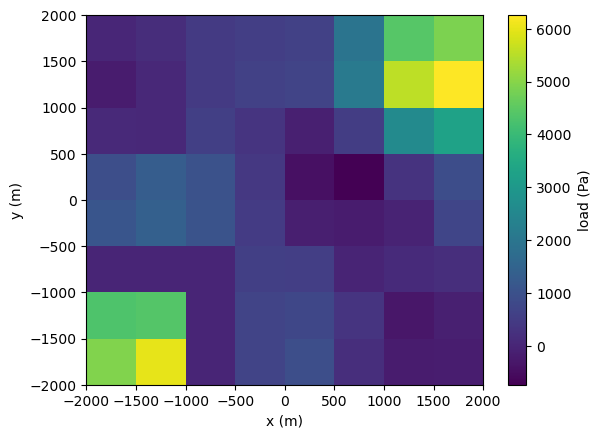

In [5]:
mode = 'lbfgs_fast'
sigma= None
Cm1 = 'laplacian'
logpath = '/home/parisnic/project/disp2load'

t1 = time.time()
ps_inverted = disp2load.disp2load(E,v,rs,xs,ys,Us_noisy,mode=mode, lamb=1e-6, epsilon=1e-35, gamma_coeff=0.1,Cm1=Cm1, sigma=sigma,
                                 constraint=constraint, maxit=1e4, verbose=0, logpath=logpath )
print(time.time()-t1)

plt.pcolormesh(np.linspace(-1750,1750,8),np.linspace(-1750,1750,8),ps_inverted)
cbar = plt.colorbar()
cbar.set_label('load (Pa)')

plt.xlabel('x (m)')
plt.ylabel('y (m)')
# plt.legend(loc='lower right')

# np.save(f'ps_inverted_simple_mode={mode}', ps_inverted)
# plt.savefig(f'simple_load_inverted.pdf', dpi=300, bbox_inches='tight')

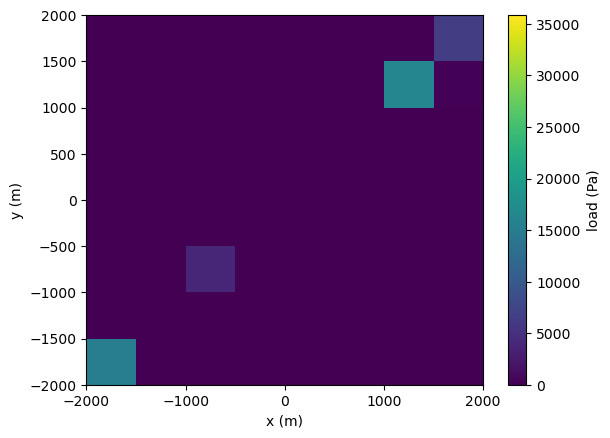

In [53]:
#on load les 3 ps inverted et on cherche le max pour bien scale la load pour les autres figures 
ps_inverted0 = np.load('ps_inverted_simple_mode=0.npy')
ps_inverted1 = np.load('ps_inverted_simple_mode=1.npy')
ps_inverted2 = np.load('ps_inverted_simple_mode=2.npy')

vmax = np.max([ps.max(), ps_inverted0.max(),ps_inverted1.max(),ps_inverted0.max()])

plt.figure()
plt.pcolormesh(np.linspace(-1750,1750,8),np.linspace(-1750,1750,8),ps_inverted2, vmin=0, vmax=vmax)
cbar = plt.colorbar()
cbar.set_label('load (Pa)')
# plt.scatter(xs,ys,marker='^',linewidths=1, edgecolors='black', color='white')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.locator_params(nbins=6,axis='x')
# plt.savefig('simple_source.pdf',dpi=300,bbox_inches='tight')
plt.savefig('displacement_simple_source.pdf',dpi=300,bbox_inches='tight')

In [19]:
#performing a L curve to determine the best value for alpha 

data_number = len(Us[:,0])*len(Us[0,:])
source_number = len(rs[:,0,0,0])*len(rs[0,:,0,0])

l = E * v / ((1 + v) * (1 - 2 * v))
m = E / (2 * (1 + v))    
disp_obs = Us_noisy.reshape(data_number)
G = disp2load.build_G(rs,xs,ys,l,m)

laplacian = disp2load.build_laplacian(rs)

lambs = np.logspace(-9,-4,20)
norm_laplacian_ps = np.zeros(len(lambs)) #calcul de la norme des solutions
res = np.zeros(len(lambs)) #calcul de la norme des résidus


for i in range(len(lambs)):
    lamb = lambs[i]
    ps_inverted =  disp2load.disp2load(E,v,rs,xs,ys,Us_noisy,mode='linear', lamb=lamb, epsilon=1e-35, gamma_coeff=0.1,Cm1='gaussian', sigma=1e-3,
                                 constraint=None, maxit=1e4, verbose=0, logpath=None)
    
    norm_laplacian_ps[i] = np.sqrt(np.sum((laplacian@ps_inverted.reshape((source_number,1)))**2)) #osef de la norme de ps, nous on voudrait vérifier la norme du laplacien plutôt 
    
    disp_cal = G@ps_inverted.reshape(source_number)
    res[i] = np.sqrt(np.sum((disp_obs-disp_cal)**2))
    


Text(0, 0.5, '$|| \\mathbf{G p} - \\mathbf{d} ||_2^2$')

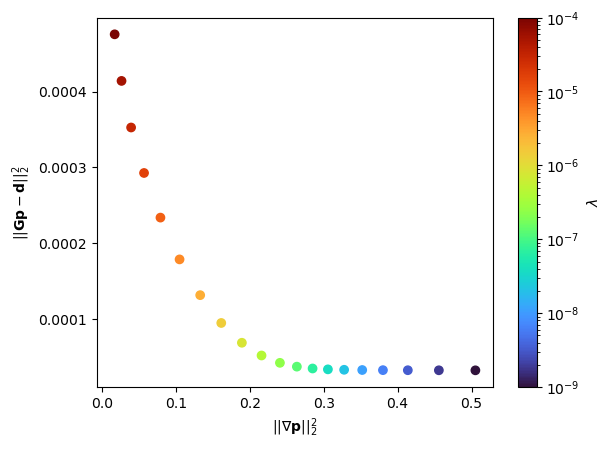

In [20]:
import matplotlib

plt.figure()
im = plt.scatter(norm_laplacian_ps, res,c=lambs, cmap='turbo', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(im)
cbar.set_label(r'$\lambda$')


# for i in range(len(alpha_list)):
#     plt.text(norm_regu[i],misfit[i],f'{round(alpha_list[i])}')

plt.xlabel(r'$|| \nabla \mathbf{p} ||^2_2$')
plt.ylabel(r'$|| \mathbf{G p} - \mathbf{d} ||_2^2$')


2.3357214690901214e-07


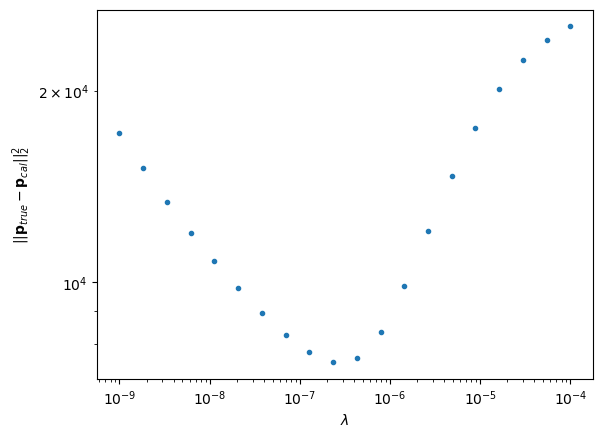

In [18]:
#verification avec la ground truth 

L2_ps = np.zeros(len(lambs))

for i in range(len(lambs)) :
    ps_cal = disp2load.disp2load(E,v,rs,xs,ys,Us_noisy,mode='linear', lamb=lambs[i], epsilon=1e-35, gamma_coeff=0.1,Cm1='gaussian', sigma=1e-3,
                                 constraint=None, maxit=1e4, verbose=0, logpath=None)
    L2_ps[i] = np.sqrt(np.sum((ps-ps_cal)**2)) 
        
plt.figure()
plt.loglog(lambs, L2_ps,linewidth=0, marker='.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$|| \mathbf{p}_{true} - \mathbf{p}_{cal} ||_2^2$') #ps is the true load distribution 

print(lambs[np.argmin(L2_ps)])


In [14]:
print(alphas[np.argmin(L2_ps)])

4.71486636345739e-07


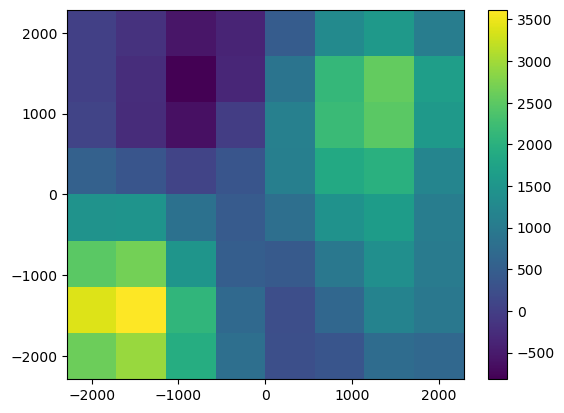

In [12]:
ps_inverted = disp2load.disp2load(E,v,rs,xs,ys,Us_noisy,mode=1, alpha=1e-5)
plt.pcolormesh(np.linspace(-2000,2000,8),np.linspace(-2000,2000,8),ps_inverted)
plt.colorbar()

# Approche non linéaire pour voir si la L curve focntionne aussi avec approche liénaire 

# Approche avec la gaussienne -> à retirer une fois que l'implémentation est fonctionnelle

Text(0, 0.5, 'y (m)')

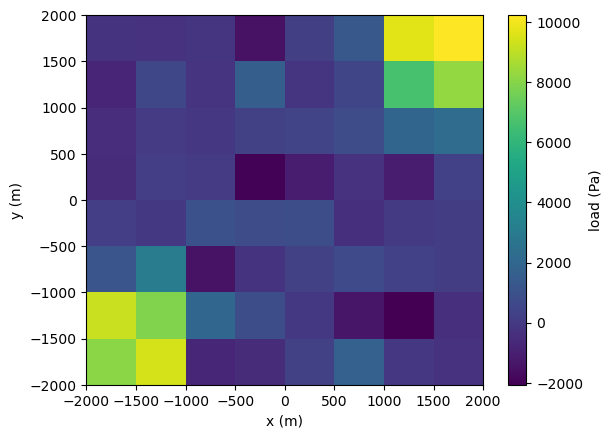

In [22]:
sigma = 2e-3
mode = 3 

ps_inverted = disp2load.disp2load(E=E,v=v,rs=rs,xs=xs,ys=ys,Us=Us_noisy,mode=mode,epsilon=1e-20, lamb=1e-8, gamma_coeff=0.1,sigma=sigma) #alpha = 1 adapté si use le mode 1 
plt.pcolormesh(np.linspace(-1750,1750,8),np.linspace(-1750,1750,8),ps_inverted)
cbar = plt.colorbar()
cbar.set_label('load (Pa)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Hilary

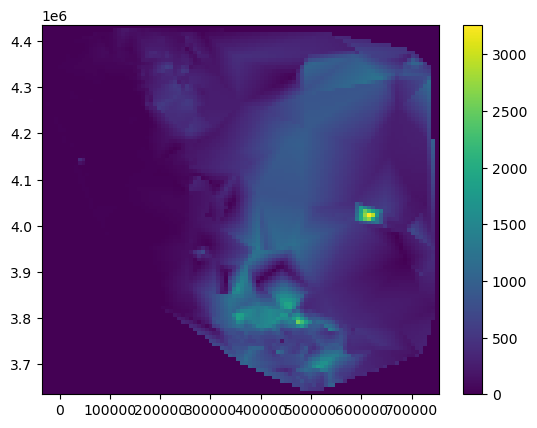

In [24]:
#loading the load dsitubiton 
ps = np.load('ps_precipitations_hilary.npy')
ps[np.where(np.isnan(ps)==True)] = 0

#no we need to know the x and y ticks and use that information to create the rs  -> we are already on x y, so no need to actually go back to lat lon coordinates ... 
xr = np.linspace(-31241.831049184548, 749768.9670936721, 100) #ces dooronnées correcpondent au milieu des pixels -> donc rs doit être un peu au dela de ces bounds
yr = np.linspace(3638619.8502579452, 4431792.876044568, 100)
dx = xr[1]-xr[0]
dy = yr[1]-yr[0]

rs = utils.create_source_mesh(xr[0]-dx/2,xr[-1]+dx/2,yr[0]-dy/2,yr[-1]+dy/2,ps)

plt.figure()
plt.pcolormesh(xr,yr,ps)
plt.colorbar()

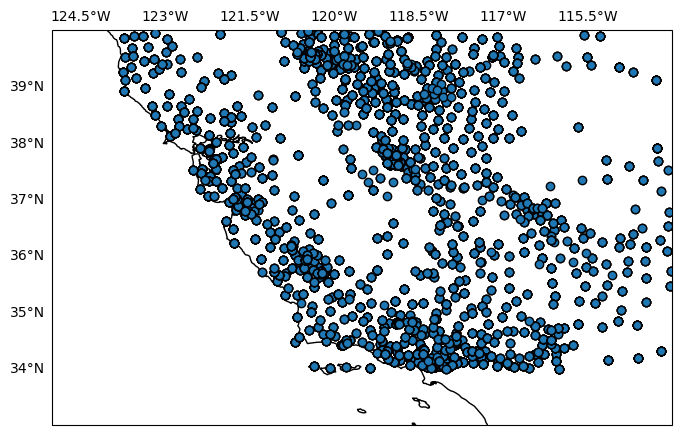

In [38]:
#maintenant que l'on a la distrub de charges + le mesh associé pour savoir les coordoondées des charges, il nous faut à présent définir où fait les mesures et les params 
#loading the station locaitons 
with open('stations_us.json') as f:
    stations_loc = json.load(f)
    
latall = np.zeros(len(stations_loc))
lonall = np.zeros(len(stations_loc))

for i in range(len(stations_loc)):
    latall[i] = stations_loc[i]['latitude'] 
    lonall[i] = stations_loc[i]['longitude']
    # if stations_loc[i]['id']=='POMM':
    #     print('yes')
    
extent = [-125,-114,33,40]

osm = OSM()
fig = plt.figure(figsize=(8,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, zoom=0, crs=ccrs.PlateCarree())

ax.coastlines() 
ax.set_xlabel('lon (°)')
ax.set_ylabel('lat (°)')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=0, color='gray', alpha=0.0, linestyle='--')

gl.bottom_labels = False
gl.right_labels = False


im = ax.scatter(lonall,latall, edgecolors='black'
               , linewidth=1, transform=ccrs.PlateCarree(), zorder=5)



Station used : 4010


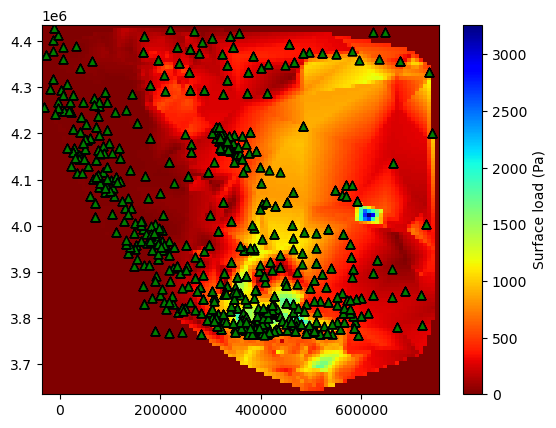

In [39]:
#maintenant on convert en x y 
#en fait on va pas de cantonner aux states mais va faire selon une window de displacement 
xall, yall = utils.latlon2xy(latitudes=latall, longitudes=lonall, elevations=None, zone=11)

xallmin = np.min(xr)
xallmax = np.max(xr)
yallmin = np.min(yr)
yallmax = np.max(yr)
sta2keep = np.where((xall>=xallmin) & (xall<=xallmax) & (yall>=yallmin) & (yall<=yallmax))[0]

sta2keep_time = [] #on va aussi vérifier quelle station enregistrait vraiment au moment car y'en a beaucoup trop en global 

starttime = UTCDateTime('2023-08-16')
endtime = UTCDateTime('2023-08-26')

for i,idx in enumerate(sta2keep):
    start =  UTCDateTime(stations_loc[idx]['session_start_time']) #pour chacune des stations sélectionnées on récupère son start et end pour voir si reocordait bien 
    end = UTCDateTime(stations_loc[idx]['session_stop_time'])
    if starttime-start >0 and end-endtime>0: 
        sta2keep_time.append(idx)
    

### converting the coordinates to x y
xs, ys =  xall[sta2keep_time], yall[sta2keep_time] #utils.latlon2xy(latitudes=stations_loc['Latitude_(deg)'].values[sta2keep], longitudes=stations_loc['Longitude_(deg)'].values[sta2keep], elevations=None, zone=11) #zone 11 pour notre partie de california
nsta = len(xs)
print('Station used :',nsta)
lats, lons = latall[sta2keep_time], lonall[sta2keep_time]
latr, lonr = utils.xy2latlon(x=xr, y=yr,  zone=11)

#plotting the stations on the map to see the coverage compared to the source lcoation
plt.figure()
plt.pcolormesh(xr,yr,ps, cmap='jet_r')
plt.locator_params(nbins=6,axis='x')
cbar = plt.colorbar()
cbar.set_label('Surface load (Pa)')
plt.scatter(xs,ys,marker='^', color='green', linewidths=1, edgecolors='black')   

plt.savefig('station_distribution_hilary.png',dpi=300,bbox_inches='tight')

Cellule pour claculer les déplacements en tous les points 

In [ ]:
E = 75e9
v = 0.25

#### VERSION LENTE #### 
# z = 0 #va mettre toutes les stations à 0 m
# Us = np.zeros((len(xs), 3)) #on va faire seulement une ligne de displaements dans ce cas car on a pas des mesures régulières !

# for vy_idx in trange(len(ps[:,0])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
#     for vx_idx in range(len(ps[0,:])): 
#         p = ps[vy_idx,vx_idx]
#         if p!=0: #si p =0 alors pas besoin de calculer l'influence de cette source car nulle 
#             r = rs[vy_idx,vx_idx]
#             for i in range(nsta):
#                 xyz = [xs[i], ys[i], z]
#                 U = load2disp.load2disp( xyz, r, p, E, v)
#                 Us[i, :] += U.reshape(3)


########### VERSION GIGA FAST ##### -> pas si rapide que ça apparemment ...  
l = E * v / ((1 + v) * (1 - 2 * v))
m = E / (2 * (1 + v))    

data_number = len(xs)*3
source_number = len(ps[0,:])*len(ps[:,0])
G = disp2load.build_G(rs,xs,ys,data_number,l,m)
ps_reshaped = ps.reshape(source_number,1)
Us = G@ps_reshaped
Us = Us.reshape((len(xs),3))


# data2export = np.zeros((nsta, 5))
# data2export[:,0] = latall[sta2keep_time]
# data2export[:,1] = lonall[sta2keep_time]
# data2export[:,2:6] = Us
# np.save('data_Hilary_synthetic.npy',data2export) #save les déplaements calculés pour pas à avoir à les reclaculer par la suite

(4010, 3)


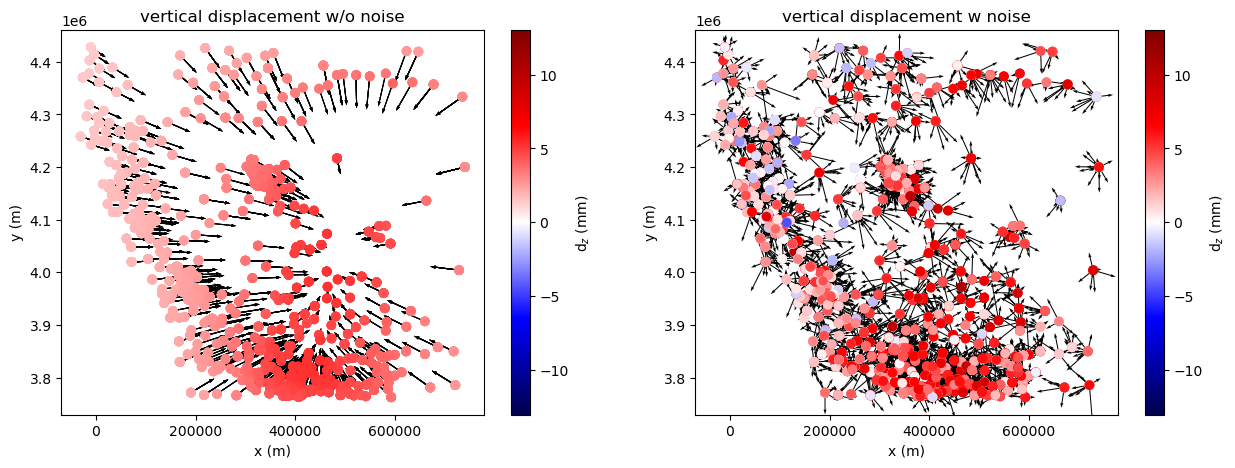

In [44]:
data = np.load('data_Hilary_synthetic_nonoise.npy')
Us = data[:,2:5].copy()
#On rajoute à présent du bruit sur le déplacement 
# Us_noisy = Us.copy()
# Us_noisy[:,0:2] += np.random.normal( loc=0.0, scale=0.0008, size=Us[:,0:2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 
# Us_noisy[:,2] += np.random.normal( loc=0.0, scale=0.0025, size=Us[:,2].shape ) #pourrait faire noise plus ou moins fort sur les composantes -> par ex 
# data[:,2:5] = Us_noisy
# np.save('data_Hilary_synthetic_noisy3.npy',data)

data_noisy = np.load('data_Hilary_synthetic_noisy.npy')
Us_noisy = data_noisy[:,2:5].copy()
print(Us_noisy.shape)

vmaxus = np.max(np.abs(Us[:,2]*1000))
vmaxus_noisy = np.max(np.abs(Us_noisy[:,2]*1000))
vmax = np.max([vmaxus,vmaxus_noisy])
                
arrow_coeff = 100

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.quiver(xs, ys, Us[:,0]*arrow_coeff, Us[:,1]*arrow_coeff, color='black', scale=1)
im = ax1.scatter(xs,ys,c=Us[:,2]*1000,label='z displacement', vmax=vmax, vmin=-vmax, cmap='seismic') 
cbar = plt.colorbar(im)
cbar.set_label(r'd$_z$ (mm) ')
ax1.set_title('vertical displacement w/o noise')
ax1.set_ylabel('y (m)')
ax1.set_xlabel('x (m)')
ax1.locator_params(nbins=6,axis='x')

# ax1.legend()
ax2.quiver(xs, ys, Us_noisy[:,0]*arrow_coeff, Us_noisy[:,1]*arrow_coeff, color='black', scale=3)
im = ax2.scatter(xs,ys,c=Us_noisy[:,2]*1000,label='z displacement', vmax=vmax, vmin = -vmax, cmap='seismic') 
cbar= plt.colorbar(im)
cbar.set_label(r'd$_z$ (mm) ')
ax2.set_title('vertical displacement w noise')
ax2.set_ylabel('y (m)')
ax2.set_xlabel('x (m)')
ax2.locator_params(nbins=6,axis='x')

# plt.savefig('displacements_hilary.png',dpi=300,bbox_inches='tight')

In [6]:
# np.sqrt((np.max(Us[:,0])*1000)**2+(np.max(Us[:,1])*1000)**2)

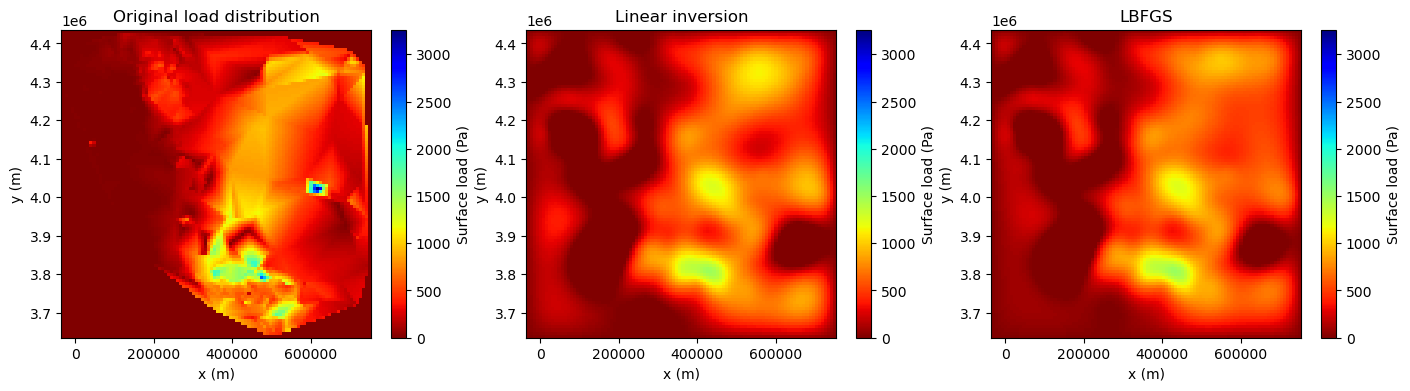

In [16]:
#à présent il reste plus qu'à solve le problème inverse 
nxinv = 100
nyinv = 100
xrinv = np.linspace(-31241.831049184548, 749768.9670936721, nxinv) #ces dooronnées correcpondent au milieu des pixels -> donc rs doit être un peu au dela de ces bounds
yrinv = np.linspace(3638619.8502579452, 4431792.876044568, nyinv)
dxinv = xrinv[1]-xrinv[0]
dyinv = yrinv[1]-yrinv[0]
rs4inversion =  utils.create_source_mesh(xrinv[0]-dxinv/2,xrinv[-1]+dxinv/2,yrinv[0]-dyinv/2,yrinv[-1]+dyinv/2,np.zeros((nyinv,nxinv)))  #osef ici du mesh 

# ps_inverted = disp2load.disp2load(E,v,rs4inversion,xs,ys,Us,mode=1, alpha=10, epsilon=1e-6, gamma_coeff=1e-2)
ps_inverted = np.load('inversion/ps_no_noise_0.004297004704320835.npy')
ps_inverted = np.load('inversion/ps_174263.33860096507.npy')

# ps_inverted_noisy = np.load('inversion/ps_mode=1_alpha=613590.7273413176_nx=100_ny=100_noisy.npy') #best result à priori 
# ps_inverted_noisy = np.load('inversion/ps_174263.33860096507.npy') #résultat pris à partir de la L curve 
ps_inverted_noisy = np.load('inversion/ps_LBFGS_170276.91722258978.npy') #on a bien le même résultat avec le LFBGS 

vmax = np.max([ps.max(),ps_inverted.max(),ps_inverted_noisy.max()])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,4))
im = ax1.pcolormesh(xr,yr,ps, vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
ax1.set_title(f'Original load distribution')
ax1.set_ylabel('y (m)')
ax1.set_xlabel('x (m)')
ax1.locator_params(nbins=6,axis='x')

# im = ax2.pcolormesh(xrinv,yrinv,ps_inverted,vmin=0, vmax=vmax, cmap='jet_r')
# cbar = plt.colorbar(im)
# cbar.set_label('Surface load (Pa)')
# ax2.set_title(f'Inverted without noise') 
# ax2.set_xlabel('x (m)')
# ax2.set_ylabel('y (m)')
# ax2.locator_params(nbins=6,axis='x')

im = ax2.pcolormesh(xrinv,yrinv,ps_inverted,vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
ax2.set_title(f'Linear inversion') 
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.locator_params(nbins=6,axis='x')

im = ax3.pcolormesh(xrinv,yrinv,ps_inverted_noisy,vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
ax3.set_title(f'LBFGS')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.locator_params(nbins=6,axis='x')

plt.savefig('load_distribution_hilary_comp.png',dpi=300,bbox_inches='tight')

# Cellule pour savoir quelle valeur de lambda devrait théoriquement être trouvée 

1846424.9428955426
19769.48901156146


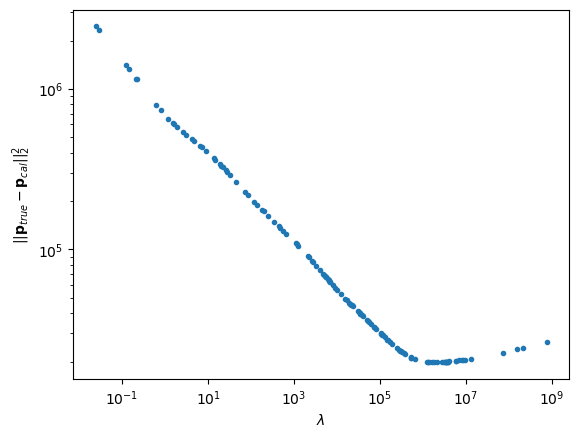

In [30]:
#on fait maintenant la L-curve pour essayer de trouver le meilleur trade-off entre n'imp et le lissage
# print(np.sum(np.abs(ps-ps_inverted_noisy))/10000)

#pour savoir qui est véritablement le meilleure on peut dair eune norme L1 ou l2 sur les ps entre le vrai et celui inversé avec le bruit mais en vrai on a pas accès à ça 
import numpy as np
import glob
import re
# Find all .npy files in the directory that end with the specified string

Usname = 'Us'
psname = 'ps'

file_list = glob.glob(f'inversion/{psname}_*.npy')

def remove_strings_starting_with(lst, prefix):
    return [item for item in lst if not item.startswith(prefix)]

file_list = remove_strings_starting_with(file_list,'inversion/ps_LBFGS')
# file_list = remove_strings_starting_with(file_list,'inversion/ps_no_noise')

# print(file_list)
##################################
def extract_number_from_filename(filename):
    # pattern = fr'inversion/{psname}_([0-9]+\.[0-9]+)\.npy'
    pattern = r'\d+(?:\.\d+)?(?:[eE][-+]?\d+)?'
    match = re.search(pattern, filename)
    if match:
        extracted_number = match.group()
        return float(extracted_number)
    else:
        return None
    
l2_ps = np.zeros(len(file_list))
alpha_list = np.zeros(len(file_list))

for i, file in enumerate(file_list):
    alpha = extract_number_from_filename(file)
    alpha_list[i] = alpha
    ps_cal = np.load(f'inversion/{psname}_{alpha}.npy') 
    l2_ps[i] = np.sqrt(np.sum((ps-ps_cal)**2)) 
    

plt.figure()
plt.loglog(alpha_list, l2_ps,linewidth=0, marker='.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$|| \mathbf{p}_{true} - \mathbf{p}_{cal} ||_2^2$') #ps is the true load distribution 

# plt.savefig('true_evol.pdf', dpi=300, bbox_inches='tight')

print(alpha_list[np.argmin(l2_ps)])

print(np.min(l2_ps))

#on voit qu'avec lambda = 10^6 on a le misfit le plus faible  entre ps et ps_cal -> donc on va chercher à trouver quelle approche nous permettrait aussi de trouver 10^6 pour lambda

## Celllule pour load les ps inverted et les Us calculés à partir des ps -> permet de faire la L curve pour savoir quelle valeur de lambda a donné le meilleur ps

In [15]:
import numpy as np
import glob
import re

Usname = 'Us_LBFGS'
psname = 'ps_LBFGS'

# Find all .npy files in the directory that end with the specified string
file_list = glob.glob(f'inversion/{Usname}_*.npy')

##################################
def extract_number_from_filename(filename):
    # pattern = r'inversion/Us2_([0-9]+\.[0-9]+)\.npy'
    pattern = r'\d+(?:\.\d+)?(?:[eE][-+]?\d+)?'
    match = re.search(pattern, filename)
    if match:
        extracted_number = match.group()
        return float(extracted_number)
    else:
        return None
    
misfit = np.zeros(len(file_list))
norm_regu = np.zeros(len(file_list))
alpha_list = np.zeros(len(file_list))

for i, file in enumerate(file_list):
    Us_cal = np.load(file)
    alpha = extract_number_from_filename(file)
    # if alpha > 10**(-4) and alpha < 10**2:
    alpha_list[i] = alpha
    ps_cal = np.load(f'inversion/{psname}_{alpha}.npy')
    ps_cal = ps_cal.reshape((ps_cal.shape[0]*ps_cal.shape[1],1))
    misfit[i] = np.sqrt(np.sum((Us_cal-Us_noisy)**2)) #calcul du résidu entre ce qui est enregistré et ce qui est calculé à partir de la distribution de charge inversée 
    #faut aussi la norme du laplacien pour savoir l'autre dimension 
    laplacian = disp2load.build_laplacian(rs)
    norm_regu[i] = np.sqrt(np.sum((laplacian@ps_cal)**2))
    
# Loop through each file and load them using NumPy
# for file_path in file_list:
#     try:
#         loaded_data = np.load(file_path)
#         ps_summed += loaded_data
#         n+=1
#         # Process the loaded data or perform necessary operations
#         print(f"Loaded {file_path}: {loaded_data.shape}")  # Modify or use the data as needed
#     except Exception as e:
#         print(f"Failed to load {file_path}: {e}")

Text(0, 0.5, '$|| \\mathbf{G p} - \\mathbf{d} ||_2^2$')

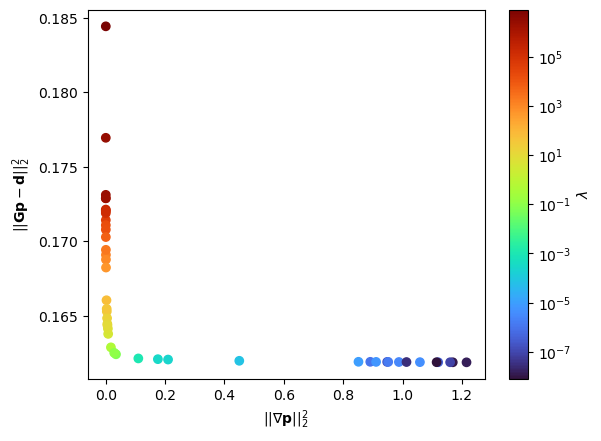

In [17]:
import matplotlib

plt.figure()
im = plt.scatter(norm_regu, misfit,c=alpha_list, cmap='turbo', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(im)
cbar.set_label(r'$\lambda$')

# plt.yscale('log') #là faut la mettre en log log pour que ça ressemble à un coude 
# plt.xscale('log')


# for i in range(len(alpha_list)):
#     plt.text(norm_regu[i],misfit[i],f'{round(alpha_list[i])}')

plt.xlabel(r'$|| \Delta \mathbf{p} ||^2_2$')
plt.ylabel(r'$|| \mathbf{G p} - \mathbf{d} ||_2^2$')

# plt.savefig('L_curve.pdf', dpi=300, bbox_inches='tight')

# plt.title('L curve')

## Critère de moroz...  on doit prendre valeur de alpha qui permet d'avoir la différence entre données cal et observées égale au niveau de bruit -> donc 1 mm sur horizontal et 3 mm en vertical 

0.4824108704165374


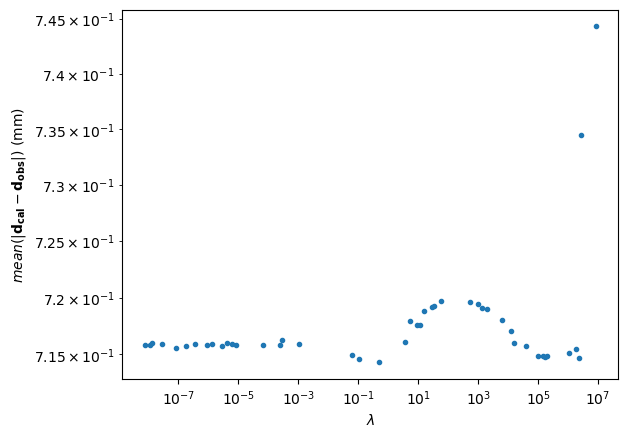

In [18]:
import numpy as np
import glob
import re
# Find all .npy files in the directory that end with the specified string
file_list = glob.glob(f'inversion/{Usname}_*.npy')
##################################
def extract_number_from_filename(filename):
    # pattern = r'inversion/Us2_([0-9]+\.[0-9]+)\.npy'
    pattern = r'\d+(?:\.\d+)?(?:[eE][-+]?\d+)?'
    match = re.search(pattern, filename)
    if match:
        extracted_number = match.group()
        return float(extracted_number)
    else:
        return None
    
misfit_horizontal = np.zeros(len(file_list))
misfit_vertical = np.zeros(len(file_list))
alpha_list = np.zeros(len(file_list))

for i, file in enumerate(file_list):
    Us_cal = np.load(file)
    alpha = extract_number_from_filename(file)
    
    # if alpha > 10**(-7):
    alpha_list[i] = alpha

    diff_e = np.mean(np.abs(Us_cal[:,0]-Us_noisy[:,0]))
    diff_n = np.mean(np.abs(Us_cal[:,1]-Us_noisy[:,0]))
    misfit_horizontal[i] = np.mean([diff_e, diff_n]) 
    misfit_vertical[i] = np.mean(np.abs(Us_cal[:,2]-Us_noisy[:,2])**2)



# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
# ax1.plot(alpha_list, misfit_horizontal*1000,linewidth=0, marker='.', label='horizontal')
# ax1.set_title('Horizontal misfit as a function of lambda')
# ax1.set_xlabel(r'$\lambda$')
# ax1.set_ylabel(r'|Us_cal-Us_obs| (mm)')
# ax1.set_xscale('log')

# # ax1.locator_params(nbins=6,axis='x')

# # ax1.legend()
# ax2.plot(alpha_list, misfit_vertical*1000,linewidth=0, marker='.', label='vertical')
# ax2.set_title('Vertical misfit as a function of lambda')
# ax2.set_xlabel(r'$\lambda$')
# ax2.set_ylabel(r'|Us_cal-Us_obs| (mm)')
# ax2.set_xscale('log')

fig, ax = plt.subplots()
ax.plot(alpha_list, misfit_horizontal*1000,linewidth=0, marker='.', label='horizontal')
# plt.title('Horizontal misfit as a function of lambda')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$mean(|\mathbf{d_{cal}}-\mathbf{d_{obs}}|)$ (mm)')
ax.set_xscale('log')
ax.set_yscale('log')

print(alpha_list[np.argmin(misfit_horizontal)])

# plt.savefig('diff.pdf', dpi=300, bbox_inches='tight')


# Test résultat obtenu avec la gaussienne pour la régularisation : plot d'abord la norme avec ps pour quoi qeulle std devrait être utilisée pour faire la l curve -> comment choisir la std ?

best sigma =  1.0 best lambda = 1.1895340673703207e-12
23065.174196022137


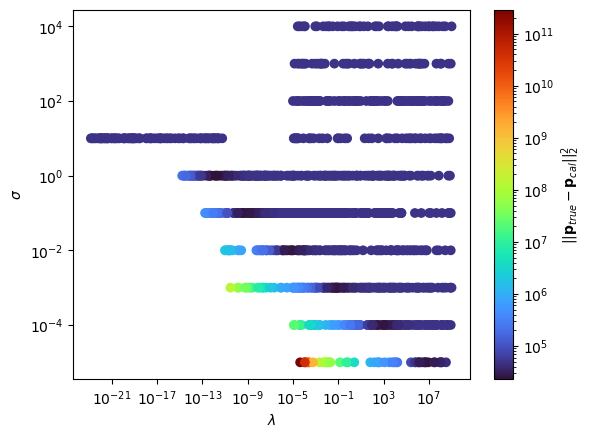

In [7]:
import numpy as np
import glob
import re
import matplotlib

file_list = glob.glob(f'inversion_gaussian/ps_*.npy')
# print(file_list)

##################################
def extract_numbers_from_filename(filename):
    pattern = r'\d+(?:\.\d+)?(?:[eE][-+]?\d+)?'
    matches = re.findall(pattern, filename)

    if len(matches) >= 2:
        extracted_numbers = [float(match) for match in matches[:2]]
        return extracted_numbers
    else:
        return None

l2_ps = np.zeros(len(file_list))
lambda_list = np.zeros(len(file_list))
sigma_list = np.zeros(len(file_list))

for i, file in enumerate(file_list):
    vals = extract_numbers_from_filename(file)
    sigma_list[i] = vals[0]
    lambda_list[i] = vals[1]
    ps_cal = np.load(f'inversion_gaussian/ps_sig_{vals[0]}_lamb_{vals[1]}.npy') 
    l2_ps[i] = np.sqrt(np.sum((ps-ps_cal)**2)) 

    
plt.figure()
im = plt.scatter(lambda_list,sigma_list,c=l2_ps,cmap='turbo',norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(im)
cbar.set_label(r'$|| \mathbf{p}_{true} - \mathbf{p}_{cal} ||_2^2$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\sigma$') #la standard deviation selon l'axe y 
plt.yscale('log')
plt.xscale('log')
plt.savefig('norm_sigma_lambda.png',dpi=300, bbox_inches='tight')

best_idx = np.argmin(l2_ps)

print('best sigma = ',sigma_list[best_idx],'best lambda =',lambda_list[best_idx])
print(np.min(l2_ps))

lowest norm for lamb = 2.097046401323239e-23
norm is 47547.5155127455


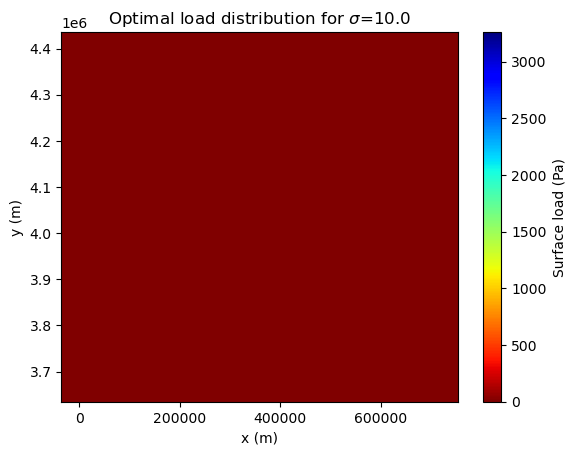

In [37]:
sigma = 1e1
idx_sig = np.where(sigma_list==sigma)[0] #on va chercher dans cette liste le min pour plotter le best du sigma choisi
lamb = lambda_list[idx_sig[np.argmin(l2_ps[idx_sig])]] #trouve l'indice du min dans la sous liste, trouve alors la valeur de cet indice dans liste gen et trouve valeur associée
print('lowest norm for lamb =',lamb)

### peut choisir le sigma à use et il choisi le best lambda à plotter pour le sigma choisi 
ps_inverted_noisy = np.load(f'inversion_gaussian/ps_sig_{sigma}_lamb_{lamb}.npy') #résultat pris à partir de la L curve 

##utilise l'abolsute best ###
# ps_inverted_noisy = np.load(f'inversion_gaussian/ps_sig_{sigma_list[best_idx]}_lamb_{lambda_list[best_idx]}.npy') #résultat pris à partir de la L curve 

print('norm is',np.sqrt(np.sum((ps-ps_inverted_noisy)**2)))

nxinv = 100
nyinv = 100
xrinv = np.linspace(-31241.831049184548, 749768.9670936721, nxinv) #ces dooronnées correcpondent au milieu des pixels -> donc rs doit être un peu au dela de ces bounds
yrinv = np.linspace(3638619.8502579452, 4431792.876044568, nyinv)

vmax = np.max([ps.max(),ps_inverted_noisy.max()])
fig, ax = plt.subplots()
im = ax.pcolormesh(xrinv,yrinv,ps_inverted_noisy, vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
ax.set_ylabel('y (m)')
ax.set_xlabel('x (m)')
ax.set_title(fr'Optimal load distribution for $\sigma$={sigma}')
ax.locator_params(nbins=6,axis='x')

plt.savefig('optimal_load_unstable.png',dpi=300, bbox_inches='tight')
#globalement le même résultat tant qu'on prend le minimum -> mais le truc c'est que 

In [11]:
#on fait à présent la L curve pour la valeur de sigma qui a été la plus concluante et on s'en sert  alors pour voir si maintenant on estime la bonne
#valeur de lambda  et ensuite faudra trouver comment savoir quelle valeur de sigma doit être used...

sigma = 1e-3 #sigma_list[best_idx]

gaussian = np.load(f'gaussian_{sigma}.npy') #disp2load.build_gaussian(rs,sigma) #build au préalable la gaussian
gaussian_inv = np.linalg.inv(gaussian)
# gaussTgauss = gaussian_inv.T@gaussian_inv
print('gaussian built and inverted, ready to compute')
file_list = glob.glob(f'inversion_gaussian/Us_sig_{sigma}_*.npy') #liste tous les fichiers qui usent de la bonne dvaleur de sigma -> trace la L-curve pour un sigma donné

misfit = np.zeros(len(file_list))
norm_regu = np.zeros(len(file_list))
lambda_list = np.zeros(len(file_list))


for i, file in enumerate(file_list):
    Us_cal = np.load(file)
    vals = extract_numbers_from_filename(file)
    lambda_list[i] = vals[1]
    ps_cal = np.load(f'inversion_gaussian/ps_sig_{sigma}_lamb_{vals[1]}.npy')
    ps_cal = ps_cal.reshape((ps_cal.shape[0]*ps_cal.shape[1],1))
    misfit[i] = np.sqrt(np.sum((Us_cal-Us_noisy)**2)) #calcul du résidu entre ce qui est enregistré et ce qui est calculé à partir de la distribution de charge inversée 
    #faut aussi la norme du laplacien pour savoir l'autre dimension 
    norm_regu[i] = np.sqrt(np.sum((gaussian_inv@ps_cal)**2))    

gaussian built and inverted, ready to compute


Text(0, 0.5, '$|| \\mathbf{G p} - \\mathbf{d} ||_2^2$')

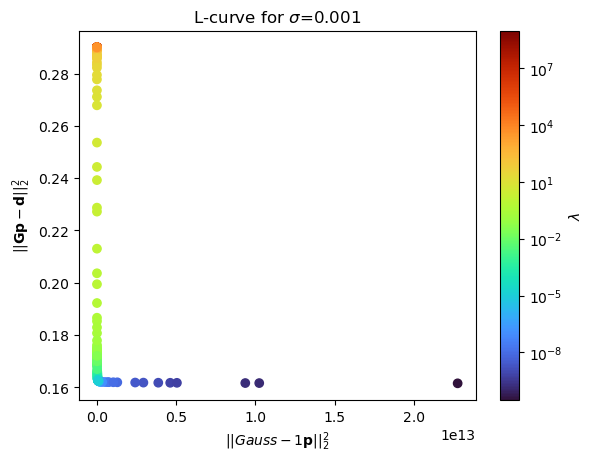

In [12]:
import matplotlib
import matplotlib.patches as patches

# ymin, ymax = 0.171, 0.173
# xmin, xmax = 0, 3000 
# idx1 = np.where((misfit>ymin) & (misfit<ymax))[0]
# idx2 = np.where((norm_regu>0) & (norm_regu<xmax))[0]
# best_idx_lcurve = np.intersect1d(idx1,idx2)
# best_lamb_lcurve = lambda_list[best_idx_lcurve]
# print('best value of lambda estimated from L-curve =',best_lamb_lcurve.mean()) 


fig, ax = plt.subplots()
im = ax.scatter(norm_regu, misfit,c=lambda_list, cmap='turbo', norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar(im)
cbar.set_label(r'$\lambda$')

# ax.set_ylim(0.16,0.18)
# ax.set_xlim(-5,5000)
# rectangle = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
# ax.add_patch(rectangle)

ax.set_title(fr'L-curve for $\sigma$={sigma}')
ax.set_xlabel(r'$|| Gauss-1 \mathbf{p} ||^2_2$')
ax.set_ylabel(r'$|| \mathbf{G p} - \mathbf{d} ||_2^2$')

### on regarde quelle est l'erreur sur l'estimation de lambda en focntion de la std 

1.0473708979594487e-07


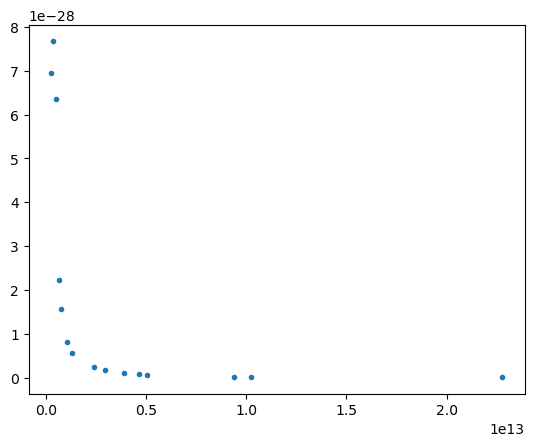

In [31]:
#code la détection automatique de la valeur de lambda dans la L curve

#pouurrait aussi trouver les lambdas à partir de la l curve automztiquement en utilisant la dérivée de la L-curve..
def extract_lambda_from_Lcurve(norm_regu,misfit,lambda_list,plot=False):
    sorted_indices = np.argsort(norm_regu)
    x_sorted = norm_regu[sorted_indices]
    y_sorted = misfit[sorted_indices]
    lambda_list_sorted = lambda_list[sorted_indices]
    # start_idx = np.argmin(np.abs(threshold*np.median(y_sorted)-y_sorted))
    conv = False #we gonna loop over starting index to find from which index there no longer is unstability 
    start_idx = -1
    while conv==False:
        start_idx += 1 
        x_sorted_cropped = x_sorted[start_idx:]
        y_sorted_cropped = y_sorted[start_idx:]
        # Compute the discrete derivative of y with respect to x
        dy_dx = np.gradient(y_sorted_cropped, x_sorted_cropped)
        d2y_dx2 = np.gradient(dy_dx, x_sorted_cropped)
        idx_max = np.argmax(d2y_dx2)
        if np.max(np.abs(d2y_dx2))<1e-27: #if much lower than 1 it means that it's stable  
            conv = True
        # if x_sorted_cropped[1]-x_sorted_cropped[0]>10:
        #     conv=True
        
    if plot==True:
        plt.plot(x_sorted_cropped, d2y_dx2,linewidth=0,marker='.')
    return lambda_list_sorted[start_idx+idx_max] 

print(extract_lambda_from_Lcurve(norm_regu,misfit,lambda_list,plot=True))


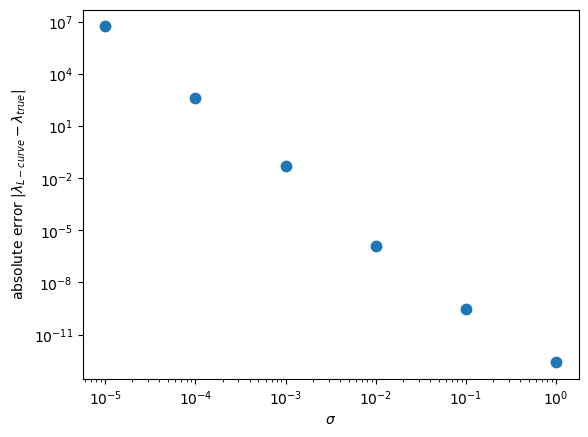

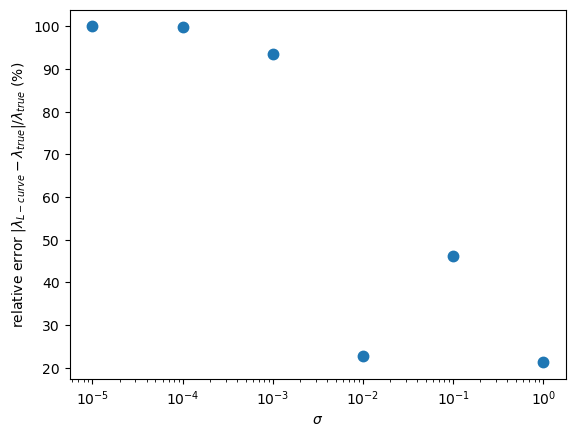

In [257]:
#on trace à la main en fonction de sigma la différence entre la valeur de lambda best et la valeur de lambda estimée par la L curve ->  on veut 0!!
sigmas = np.array([1e-5,1e-4,1e-3,1e-2,1e-1,1e0])

lambdas_true = np.array([5607169.938205446,396.2688638701478,0.05353566677410724,5.607169938205458e-06,6.593188271333542e-10,
                        1.1895340673703207e-12])

lambdas_from_lcurve = np.array([34.655935927932234,0.9845328143336356,0.003520875758339934,4.337457460439514e-06,3.5470109664273245e-10,
                               1.442284025025499e-12])



difference = np.abs(lambdas_true-lambdas_from_lcurve)

err_relative = 100*difference/lambdas_true

plt.figure()
plt.loglog(sigmas,difference,linewidth=0,marker='.',ms=15)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'absolute error $|\lambda_{L-curve}-\lambda_{true}|$')
# plt.title(r'Difference between estimated and actual best value of $\lambda$ as a function of $\sigma$')

plt.savefig('absolute_error.pdf',dpi=300,bbox_inches='tight')


#on voit que l'écart entre la valeur de lambda estimée et la vraie valeur de lambda diminue plus on utilise un sigma élevé -> on peut donc fixer une forte 
#valeur de sigma et alors on sera certains d'estimer la bonne valeur de lambda!!   


#comme on a pu le voir précédemmebt toutes les maps avec la meilleur valeur de lambdas  


plt.figure()
plt.plot(sigmas,err_relative,linewidth=0,marker='.',ms=15)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'relative error $|\lambda_{L-curve}-\lambda_{true}|/ \lambda_{true}$ (%)')
# plt.title(r'Relative error in the choice of $\lambda$ as a function of $\sigma$')
plt.xscale('log')

plt.savefig('relative_error.pdf',dpi=300,bbox_inches='tight')

#donc le mieux c'est de prendre le sigma le plus grand possible et comme ça la L-curve trouve la bonne valeur de lmabda ? -> voir en erreur relative plutôt !!

#erreur drelative bien plus faible pour forte valeur de std, -> faut donc use forte std pour avoir le meilleur résultat

### on voit que vaut mieux prendre une grande valeur de std et que si trop grande on a résultat instable qui se repère facilement -> diminution de l'erreur sur lambda plus on prend std grande 

norm is 23099.16232727297


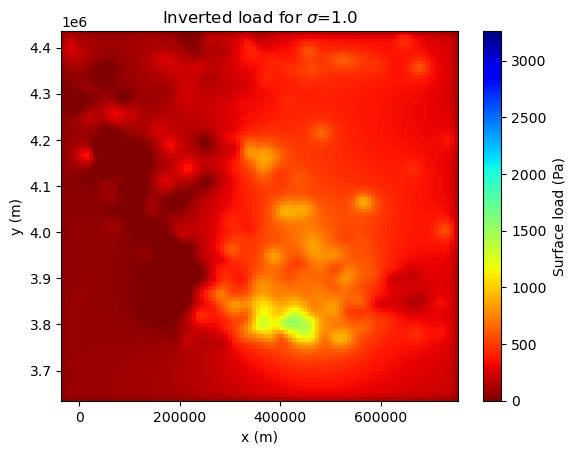

In [260]:
#on voit que même en erreur relative c'est plus avantageux de prendre grande valeur std car plus petite erreur sur estimation de lambda -> maintenant on veut 
#plotter la map obtenue pour la valeur de sigma choisie et voir ce que ça donnerait si on utilisait la valeur de lambda trouvée par l curve au lieu de la bonne 
#valeur de lambda, pour voir si effecticement c'est bien avantageux de prendre une grande valeur de sigma:
sigma = 1e-0

lambda_from_lcurve = lambdas_from_lcurve[np.argmin(np.abs(sigmas-sigma))] #cherche indice dans la liste et use valeur de lambda trouvée 

#doit maintenant trouver la valeur de lambda la plus proche dans 
file_list = glob.glob(f'inversion_gaussian/Us_sig_{sigma}_*.npy') #liste tous les fichiers qui usent de la bonne dvaleur de sigma -> trace la L-curve pour un sigma donné
lambda_list = np.zeros(len(file_list))
for i, file in enumerate(file_list):
    vals = extract_numbers_from_filename(file)
    lambda_list[i] = vals[1]

#on a créé la liste de lambdas pour la valeur de espilon utilisée on cherche maintenant le lambda le plus proche
lamb = lambda_list[np.argmin(np.abs(lambda_from_lcurve-lambda_list))]
ps_inverted_lcurve = np.load(f'inversion_gaussian/ps_sig_{sigma}_lamb_{lamb}.npy') #résultat pris à partir de la L curve 

nxinv = 100
nyinv = 100
xrinv = np.linspace(-31241.831049184548, 749768.9670936721, nxinv) #ces dooronnées correcpondent au milieu des pixels -> donc rs doit être un peu au dela de ces bounds
yrinv = np.linspace(3638619.8502579452, 4431792.876044568, nyinv)

vmax = np.max([ps.max(),ps_inverted_lcurve.max()])
fig, ax = plt.subplots()
im = ax.pcolormesh(xrinv,yrinv,ps_inverted_lcurve, vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
ax.set_ylabel('y (m)')
ax.set_xlabel('x (m)')
ax.set_title(fr'Inverted load for $\sigma$={sigma}')
ax.locator_params(nbins=6,axis='x')
# plt.savefig('laplacian_load.png',dpi=300,bbox_inches='tight')


print('norm is',np.sqrt(np.sum((ps-ps_inverted_lcurve)**2)))

#### on voit qu'on est très ressemblant à ce qu'on devrait avoir avec la valeur de lambda  réelle -> donc estimation de lambda suffisante + 

In [ ]:
#globalement le même résultat tant qu'on prend le minimum -> mais le truc c'est que 

# ICI ESSAYER DE LOAD LES NOUVEAUX TRUCS INVERSÉS ET VOIR SI ON ARRIVE À PICK AUTOMATIQUEMENT LA l CURVE 

# Cellule pour faire figures avec les valeurs de lambda optimale estimées avec les diféfrentes approches (L-curve  vs  théorique  vs  diff entre displacement et le ... 

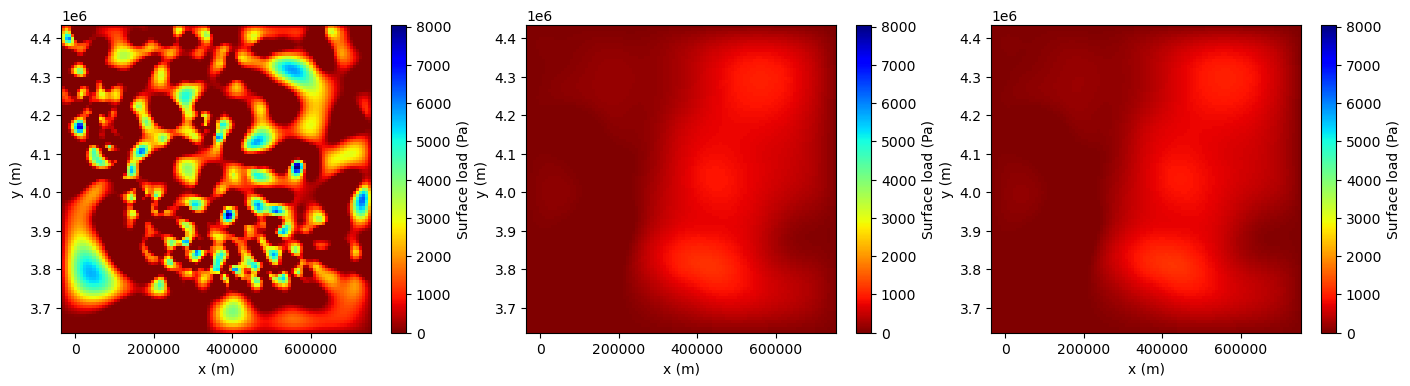

In [24]:
ps_Lcurve = np.load('inversion/ps_120.33778407775905.npy') #résultat pris à partir de la L curve 
ps_theo = np.load('inversion/ps_1846424.9428955426.npy')
ps_diff = np.load('inversion/ps_1607052.8182616385.npy')

nxinv = 100
nyinv = 100
xrinv = np.linspace(-31241.831049184548, 749768.9670936721, nxinv) #ces dooronnées correcpondent au milieu des pixels -> donc rs doit être un peu au dela de ces bounds
yrinv = np.linspace(3638619.8502579452, 4431792.876044568, nyinv)

vmax = np.max([ps_Lcurve.max(),ps_theo.max(),ps_diff.max()])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(17,4))
im = ax1.pcolormesh(xrinv,yrinv,ps_Lcurve, vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
# ax1.set_title(f'Load distribution')
ax1.set_ylabel('y (m)')
ax1.set_xlabel('x (m)')
ax1.locator_params(nbins=6,axis='x')

im = ax2.pcolormesh(xrinv,yrinv,ps_theo,vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
# ax2.set_title(f'Inverted without noise') 
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.locator_params(nbins=6,axis='x')


im = ax3.pcolormesh(xrinv,yrinv,ps_diff,vmin=0, vmax=vmax, cmap='jet_r')
cbar = plt.colorbar(im)
cbar.set_label('Surface load (Pa)')
# ax3.set_title(f'Inverted with noise') 
ax3.set_xlabel('x (m)')
ax3.set_ylabel('y (m)')
ax3.locator_params(nbins=6,axis='x')

plt.savefig('load_distribution_selection.png',dpi=300,bbox_inches='tight')


In [29]:
print(np.sum(np.abs(ps-ps_mean))/10000)

301.1322302967433


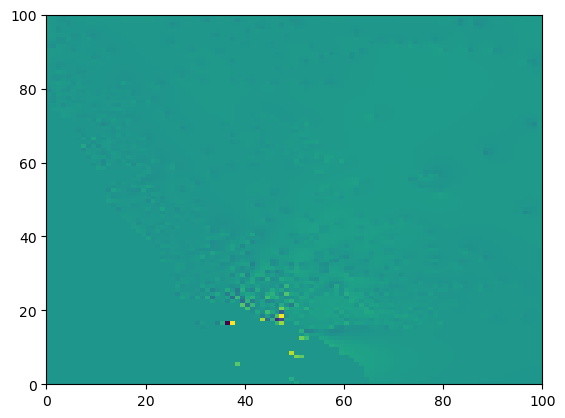

In [18]:
a = np.load('inversion_laplacian_lbfgs_nonoise_constraint_True/ps_sig_None_lamb_9.999999999999999e-06.npy.npy')
plt.pcolormesh(a)

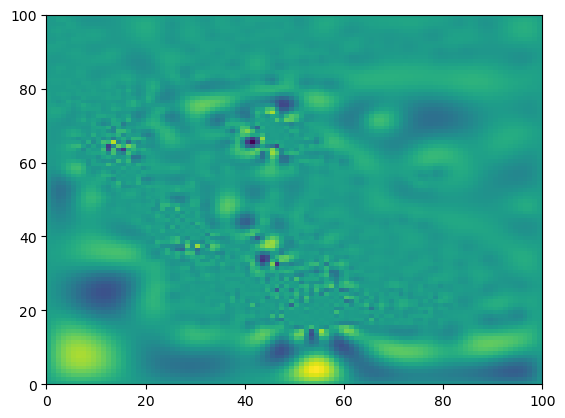

Text(0, 0.5, 'Elapsed time (s)')

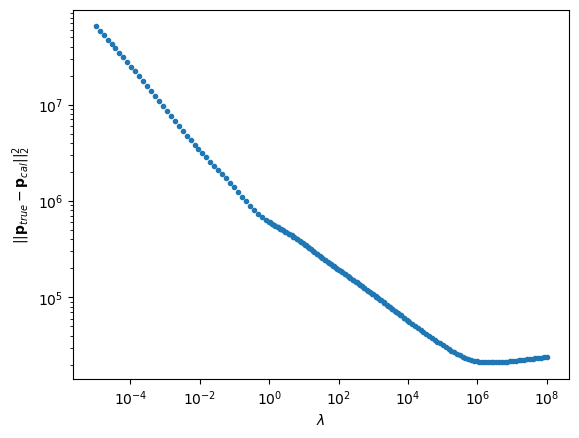

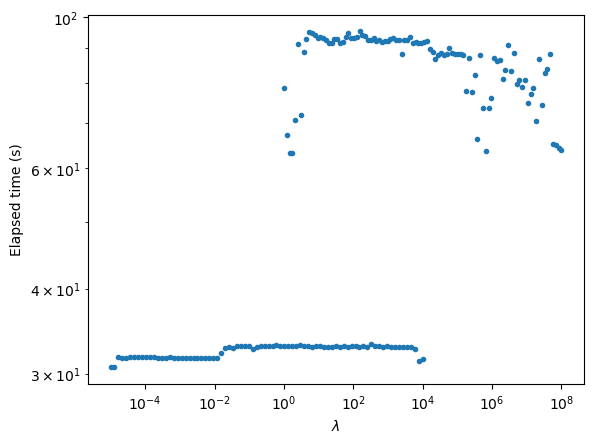

In [45]:
import numpy as np
import glob
import re
# Find all .npy files in the directory that end with the specified string


file_path = 'inversion_laplacian_linear_noisy2_constraint_False/'
file_list = glob.glob(f'{file_path}meta_*.json')

def extract_part(file_name):
    start_index = file_name.rfind('/meta') + 5
    end_index = file_name.rfind('.json')
    return file_name[start_index:end_index]

elapsed_time_list = np.zeros(len(file_list))
lambda_list = np.zeros(len(file_list))
l2_ps = np.zeros(len(file_list))

for i in range(len(file_list)):
    with open(file_list[i], 'r') as file:
        meta = json.load(file)
    elapsed_time_list[i] = meta['elapsed_time']
    lambda_list[i] = meta['lamb']
    ps_cal = np.load(file_path+'ps'+extract_part(file_list[i])+'.npy')
    l2_ps[i] = np.sqrt(np.sum((ps-ps_cal)**2)) 
    


plt.figure()
plt.loglog(lambda_list, l2_ps,linewidth=0, marker='.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$|| \mathbf{p}_{true} - \mathbf{p}_{cal} ||_2^2$') #ps is the true load distribution 


plt.figure()
plt.loglog(lambda_list, elapsed_time_list,linewidth=0, marker='.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Elapsed time (s)') #ps is the true load distribution 


In [ ]:

# plt.savefig('true_evol.pdf', dpi=300, bbox_inches='tight')

print(alpha_list[np.argmin(l2_ps)])

print(np.min(l2_ps))

#on voit qu'avec lambda = 10^6 on a le misfit le plus faible  entre ps et ps_cal -> donc on va chercher à trouver quelle approche nous permettrait aussi de trouver 10^6 pour lambda

In [ ]:
#we now need to use the correct thing  ->  on va devoir comparer la valeur de l

In [ ]:
#faire différents runs avec différentes nombres de sources pour voir le temps de calcul des différentes techniques avec le laplacien en 

In [ ]:
#fonctions pour l'inversion non liénaire 






In [29]:
correction = np.load('constraint.npy')

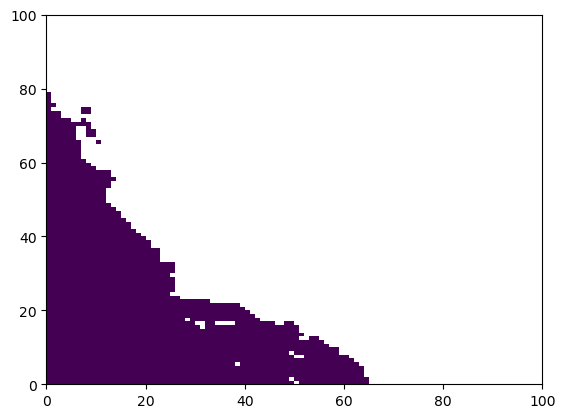

In [30]:
plt.pcolormesh(correction)